In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (14,12)
sns.set()
america_colors = ["#eeef09", "#1f77b4", "#0d560d", "#3a3838"]
europe_ns_colors = ["#0c3ec9", "#b5070a", "#ff7f0e", "#b70b82"]
europe_we_colors = ["#8c8c8c", "#4c2503", "#e377c2", "#112049"]
age_colors = ["#1f77b4", "#9467bd", "#03c403", "#e377c2", "#4c2503", "#3a3838"]
aao_colors = ["#a0a00c", "#9467bd", "#6008af", "#03c403"]
south_america_colors = ["#eeef09", "#1f77b4"]
central_america_colors = ["#0d560d"]
north_america_colors = ["#3a3838"]
eastern_europe_colors = ["#e377c2", "#112049"]
northern_europe_colors = ["#ff7f0e", "#b70b82"]
southern_europe_colors = ["#0c3ec9", "#b5070a"]
western_europe_colors = ["#8c8c8c", "#4c2503"]
asia_colors = ["#9467bd", "#6008af"]
africa_colors = ["#03c403"]
oceania_colors = ["#a0a00c"]
male_female_colors = ["#d62728", "#2ca02c"]

In [3]:
#Para manter a ordem das cores:

"""
Australia = "#a0a00c" = Mostarda
Brazil = "#eeef09" = Amarelo
Chile = "#1f77b4" = Azul Claro
Germany = "#8c8c8c" = Cinza
Israel = "#9467bd" = Lilás
Italy = "#0c3ec9" = Azul
Japan = "#6008af" = Roxo
Mexico = "#0d560d" = Verde
Netherlands = "#4c2503" = Marrom
Poland = "#e377c2" = Rosa
Russia = "#112049" = Azul Marinho
South Africa = "#03c403" = Verde Claro
Spain = "#b5070a" = Vermelho
Sweden = "#ff7f0e" = Laranja
United Kingdom = "#b70b82" = Rosa Choque
United States = "#3a3838" = Cinza Escuro
"""

'\nAustralia = "#a0a00c" = Mostarda\nBrazil = "#eeef09" = Amarelo\nChile = "#1f77b4" = Azul Claro\nGermany = "#8c8c8c" = Cinza\nIsrael = "#9467bd" = Lilás\nItaly = "#0c3ec9" = Azul\nJapan = "#6008af" = Roxo\nMexico = "#0d560d" = Verde\nNetherlands = "#4c2503" = Marrom\nPoland = "#e377c2" = Rosa\nRussia = "#112049" = Azul Marinho\nSouth Africa = "#03c403" = Verde Claro\nSpain = "#b5070a" = Vermelho\nSweden = "#ff7f0e" = Laranja\nUnited Kingdom = "#b70b82" = Rosa Choque\nUnited States = "#3a3838" = Cinza Escuro\n'

In [4]:
suicide_csv = "../csvs/suicide.csv"
hdi_csv = "../csvs/hdi.csv"
country_continent_csv = "../csvs/countryContinent.csv"
total_population_csv = "../csvs/totalPopulationCountries.csv"
total_populationF_csv = "../csvs/totalPopulationF.csv"
total_populationM_csv = "../csvs/totalPopulationM.csv"
gender_inequality_csv = "../csvs/genderInequality.csv"

In [5]:
#Lendo csv.
suicide_df = pd.read_csv(suicide_csv, sep=";")
hdi_df = pd.read_csv(hdi_csv, sep=";")
country_continent_df = pd.read_csv(country_continent_csv)
total_population_df = pd.read_csv(total_population_csv)
total_populationF_df = pd.read_csv(total_populationF_csv, sep=";")
total_populationM_df = pd.read_csv(total_populationM_csv, sep=";")
gender_inequality_df = pd.read_csv(gender_inequality_csv)

In [6]:
#Fazendo cópias do Dataframe para trabalhar com as cópias.
suicide = suicide_df.copy()
hdi = hdi_df.copy()
country_continent = country_continent_df.copy()
total_population = total_population_df.copy()
total_populationF = total_populationF_df.copy()
total_populationM = total_populationM_df.copy()
gender_inequality = gender_inequality_df.copy()

In [7]:
#Fazendo drop em colunas que não serão ultilizadas.
country_continent.drop("code_2", axis=1, inplace=True)
country_continent.drop("code_3", axis=1, inplace=True)
country_continent.drop("country_code", axis=1, inplace=True)
country_continent.drop("iso_3166_2", axis=1, inplace=True)
country_continent.drop("region_code", axis=1, inplace=True)
country_continent.drop("sub_region_code", axis=1, inplace=True)

In [8]:
#Junatando suicidio com continentes, para obter os nomes dos continentes e sub-regiões.
add_continent = pd.merge(suicide,country_continent,on=["country"], how="inner")

#Juntando continentes(gerado no merge anterior) com o idh, para obter a coluna de idh.
add_hdi = pd.merge(add_continent,hdi, on=["country","year"], how="inner")

#Adicionando a coluna de população total.
add_total_population = pd.merge(add_hdi,total_population, on=["country","year"], how="inner")

#Adicionando a coluna de população total Feminina.
add_total_populationF = pd.merge(add_total_population, total_populationF,on=["country","year"], how="inner")

#Adicionando a coluna de população total Masculina.
add_total_populationM = pd.merge(add_total_populationF, total_populationM,on=["country","year"], how="inner")

#Adicionando a coluna de desigualdade de gênero.
result = pd.merge(add_total_populationM, gender_inequality,on=["country","year"], how="inner")

In [9]:
#America
mexico= result[(result["country"] == "Mexico") & (result["year"] > 2005)]
brazil= result[(result["country"] == "Brazil") & (result["year"] > 2005)]
unitedStates= result[(result["country"] == "United States") & (result["year"] > 2005)]
chile= result[(result["country"] == "Chile") & (result["year"] > 2005)]

#Asia, africa e oceania 
japan = result[(result["country"] == "Japan") & (result["year"] > 2005)]
australia = result[(result["country"] == "Australia") & (result["year"] > 2005)]
southAfrica = result[(result["country"] == "South Africa") & (result["year"] > 2005)]
israel = result[(result["country"] == "Israel") & (result["year"] > 2005)]

#Europa
sweden = result[(result["country"] == "Sweden") & (result["year"] > 2005)]
poland = result[(result["country"] == "Poland") & (result["year"] > 2005)]
netherlands = result[(result["country"] == "Netherlands") & (result["year"] > 2005)]
germany = result[(result["country"] == "Germany") & (result["year"] > 2005)]
unitedKingdom = result[(result["country"] == "United Kingdom") & (result["year"] > 2005)]
italy = result[(result["country"] == "Italy") & (result["year"] > 2005)]
spain = result[(result["country"] == "Spain") & (result["year"] > 2005)]
russia = result[(result["country"] == "Russian Federation") & (result["year"] > 2005)]

In [10]:
#Criação de frames por Continente

frames = [mexico, brazil, chile, unitedStates]
america = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [japan, israel, australia, southAfrica]
asiaAfricaOceania= pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [sweden, unitedKingdom, italy, spain]
europe_northern_southern = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

frames = [poland, netherlands, germany, russia]
europe_western_eastern = pd.concat(frames, keys=['a', 'b', 'c', 'd'])

In [11]:
#Criação de frames por sub região.

frames = [brazil, chile]
south_america = pd.concat(frames, keys=['x', 'y'])

frames = [poland, russia]
eastern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [sweden, unitedKingdom]
northern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [italy, spain]
southern_europe = pd.concat(frames, keys=['x', 'y'])

frames = [ germany, netherlands]
western_europe = pd.concat(frames, keys=['x', 'y'])

frames = [israel, japan]
asia = pd.concat(frames, keys=['x', 'y'])

In [12]:
#America
mexico_male = mexico[(mexico["sex"] == "male")]
mexico_female = mexico[(mexico["sex"] == "female")]

unitedStates_male = unitedStates[(unitedStates["sex"] == "male")]
unitedStates_female = unitedStates[(unitedStates["sex"] == "female")]

brazil_male = brazil[(brazil["sex"] == "male")]
brazil_female = brazil[(brazil["sex"] == "female")]

chile_male = chile[(chile["sex"] == "male")]
chile_female = chile[(chile["sex"] == "female")]

#Asia, africa e Oceania
japan_male = japan[(japan["sex"] == "male")]
japan_female = japan[(japan["sex"] == "female")]

israel_male = israel[(israel["sex"] == "male")]
israel_female = israel[(israel["sex"] == "female")]

southAfrica_male = southAfrica[(southAfrica["sex"] == "male")]
southAfrica_female = southAfrica[(southAfrica["sex"] == "female")]

australia_male = australia[(australia["sex"] == "male")]
australia_female = australia[(australia["sex"] == "female")]

#Europa

netherlands_male = netherlands[(netherlands["sex"] == "male")]
netherlands_female = netherlands[(netherlands["sex"] == "female")]

unitedKingdom_male = unitedKingdom[(unitedKingdom["sex"] == "male")]
unitedKingdom_female = unitedKingdom[(unitedKingdom["sex"] == "female")]

spain_male = spain[(spain["sex"] == "male")]
spain_female = spain[(spain["sex"] == "female")]
  
italy_male = italy[(italy["sex"] == "male")]
italy_female = italy[(italy["sex"] == "female")]

germany_male = germany[(germany["sex"] == "male")]
germany_female = germany[(germany["sex"] == "female")]

poland_male = poland[(poland["sex"] == "male")]
poland_female = poland[(poland["sex"] == "female")]

russia_male = russia[(russia["sex"] == "male")]
russia_female = russia[(russia["sex"] == "female")]

sweden_male = sweden[(sweden["sex"] == "male")]
sweden_female = sweden[(sweden["sex"] == "female")]

In [13]:
#Frames de sexo separados por continente.

america_male = america[(america["sex"] == "male")]
america_female = america[(america["sex"] == "female")]

asiaAfricaOceania_male = asiaAfricaOceania[(asiaAfricaOceania["sex"] == "male")]
asiaAfricaOceania_female = asiaAfricaOceania[(asiaAfricaOceania["sex"] == "female")]

europe_ns_male = europe_northern_southern[(europe_northern_southern["sex"] == "male")]
europe_ns_female = europe_northern_southern[(europe_northern_southern["sex"] == "female")]

europe_we_male = europe_western_eastern[(europe_western_eastern["sex"] == "male")]
europe_we_female = europe_western_eastern[(europe_western_eastern["sex"] == "female")]

In [14]:
#Frames de sexo separados por sub região.

south_america_male = south_america[(south_america["sex"] == "male")]
south_america_female = south_america[(south_america["sex"] == "female")]

eastern_europe_male = eastern_europe[(eastern_europe["sex"] == "male")]
eastern_europe_female = eastern_europe[(eastern_europe["sex"] == "female")]

northern_europe_male = northern_europe[(northern_europe["sex"] == "male")]
northern_europe_female = northern_europe[(northern_europe["sex"] == "female")]

southern_europe_male = southern_europe[(southern_europe["sex"] == "male")]
southern_europe_female = southern_europe[(southern_europe["sex"] == "female")]

western_europe_male = western_europe[(western_europe["sex"] == "male")]
western_europe_female = western_europe[(western_europe["sex"] == "female")]

asia_male = asia[(asia["sex"] == "male")]
asia_female = asia[(asia["sex"] == "female")]

In [15]:
#Agrupando por países

#America
gbr = brazil.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gch = chile.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gme = mexico.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gus = unitedStates.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()

#Asia, africa e Oceania
gjp = japan.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsa = southAfrica.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gis = israel.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gau = australia.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()

#Europa
gru = russia.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsw = sweden.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gpo = poland.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gge = germany.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
git = italy.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gsp = spain.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
guk = unitedKingdom.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gne = netherlands.groupby(["year","country","sex","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()

In [16]:
gpo.head()

,year,country,sex,totalPopulationFemale,totalPopulationMale,genderInequality,gdp-year,gdp-per-capita,hdi,totalPopulation,suicides_no,population,suicides/100kpop
0,2010,Poland,female,19649274.0,18393520.0,167.0,479321460551,13304,0.835,38042794.0,840,18639430,23.53
1,2010,Poland,male,19649274.0,18393520.0,167.0,479321460551,13304,0.835,38042794.0,5517,17388361,167.11
2,2011,Poland,female,19663791.0,18399464.0,152.0,528832185770,14686,0.839,38063255.0,760,18633510,21.17
3,2011,Poland,male,19663791.0,18399464.0,152.0,528832185770,14686,0.839,38063255.0,5353,17374727,162.69
4,2012,Poland,female,19667525.0,18395639.0,150.0,500360816828,13894,0.836,38063164.0,810,18639080,22.94


In [17]:
#Agrupando por Continente

gamerica = america.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
gaao = asiaAfricaOceania.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
geurons = europe_northern_southern.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
geurowe = europe_western_eastern.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()

In [18]:
#Agrupando por sub região

south_america_group = south_america.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
eastern_europe_group = eastern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
northern_europe_group = northern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
southern_europe_group = southern_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
western_europe_group = western_europe.groupby(["year","country","totalPopulationFemale","totalPopulationMale","genderInequality","gdp-year","gdp-per-capita","hdi","totalPopulation"], as_index=False).sum()
asia_group = asia.groupby(["year","country","totalPopulationFemale","totalPopulationMale","gdp-year","gdp-per-capita","hdi"], as_index=False).sum()

In [19]:
def axis_x_center(length=1):
    start = -(length//2) if length%2 == 0 else -((length//2))
    end = (length//2) if length%2 == 0 else ((length//2)+1)
    
    return [x for x in range(start, end)]

In [20]:
#Função para gerar gráfico de taxa de suicídio por gênero.
# Os comentários abaixo podem ser aplicados paras as demais funções semelhantes.
def generate_chart_suicide_gen(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y) # label do eixo y
    plt.xlabel(axis_x) # label do eixo x
    plt.title(title) # titulo do gráfico
    plt.rcParams["figure.figsize"] = (10,8)
    ax = plt.subplot() # Necessário para plotar o tipo de gráfico que será utilizado.
    
    country_sex = list(df["sex"].unique())  # Pega os valores unicos da coluna do df.
    year_df = list(df["year"].unique())  # Pega os valores unicos da coluna do df.
    country_year = np.asarray(year_df) # Converte em um array do numpy.
    
    list_num = axis_x_center(len(country_sex))  # Centraliza os labels dos paises. - # Centraliza os labels do eixo x.
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))  # alterar as larguras dos limites no eixo x.
    plt.xticks(country_year) #  #seta os labels do eixo x
    
    for index in range(len(country_sex)):
        if country_sex[index] == "female":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationFemale"][df["sex"] == country_sex[index]])*100000)
            # Linha anterior: Monta a lista que será passada no gráfico com os dados que se quer para o gráfico. Irá variar para cada tipo de dado que quer mostrar no gráfico.
            country_list = np.asarray(country_list) # Converte em um array do numpy.
        elif country_sex[index] == "male":
            country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["totalPopulationMale"][df["sex"] == country_sex[index]])*100000)
            # Linha anterior: Monta a lista que será passada no gráfico com os dados que se quer para o gráfico. Irá variar para cada tipo de dado que quer mostrar no gráfico.
            country_list = np.asarray(country_list) # Converte em um array do numpy.
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        # Parâmetros da linha anterior: label eixo x (ex: anos), (eixo y), largura, alinhamento, as barras, lista de cores.
        ax.legend(loc="upper left") # legendas do grafico.


    plt.show()

In [21]:
#Função para gerar gráfico de taxa de suicídio por idade.
def generate_chart_suicide_age(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_age = list(df["age"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_age)) # Centraliza os labels do eixo x
    plt.xlim(country_year[0]+(wd*(list_num[0]-1)), country_year[-1]+(wd*(list_num[-1]+3))) # alterar as larguras dos limites no eixo x.
    plt.xticks(country_year) #seta os labels do eixo x
    
    for index in range(len(country_age)):
        country_list = list(df["suicides/100kpop"][df["age"] == country_age[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_age[index], color=list_colors[index])
       # label eixo x (ex: anos), (eixo y), largura, alinhamento, las barras, lista de cores.
        ax.legend(loc="upper right") # legendas do grafico.
    plt.show()

In [22]:
#Função para gerar gráfico de taxa de suicídio total por país.
def generate_chart_suicide_total(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]])*100000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [23]:
#Função para gerar gráfico de taxa de idh total por país.
def generate_chart_hdi_total(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.ylim(0.6, 1)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_hdi = list(df["hdi"][df["country"] == country_name[index]])
        country_hdi = np.asarray(country_hdi)
        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show() 

In [24]:
#Função para gerar gráfico de Desigualdade de Gênero por país.
def generate_chart_gender_inequality(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["genderInequality"][df["country"] == country_name[index]]))
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [25]:
#Função para gerar gráfico do PIB por país.
def generate_chart_gdp_year(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["gdp-year"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [26]:
#Função para gerar gráfico de população total por país.
def generate_chart_total_pop(df, axis_y, axis_x, title, list_colors, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-2)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list(df["totalPopulation"][df["country"] == country_name[index]])
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [27]:
#Função para gerar gráfico de taxa de PIB per capita por país.
def generate_chart_gdp_pc(df, axis_y, axis_x, title, list_colors,wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["gdp-year"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]]))
        country_list = np.asarray(country_list)  # converter uma lista num array numpy.
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [78]:
def generate_chart_rate_population_age(df, axis_y, axis_x, title, population_sex, list_colors,wd = 0.15):
    list_colors = list_colors
    population_sex = population_sex
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (15,10)
    ax = plt.subplot()
    
    country_age = list(df["age"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_age)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year)
    
    for index in range(len(country_age)):
        country_list = list((df["population"][df["age"] == country_age[index]]) / (df[population_sex][df["age"] == country_age[index]])*100)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_age[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

In [29]:
def generate_chart_rate_population_gen(df, axis_y, axis_x, title, list_colors, limy1= 45, limy2= 54, wd = 0.15):
    list_colors = list_colors
    
    plt.ylabel(axis_y) 
    plt.xlabel(axis_x) 
    plt.title(title)
    plt.ylim(limy1,limy2)
    plt.rcParams["figure.figsize"] = (10,8)
    ax = plt.subplot() 
    
    country_sex = list(df["sex"].unique()) 
    year_df = list(df["year"].unique()) 
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_sex))  
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3))) 
    plt.xticks(country_year) 
    
    for index in range(len(country_sex)):
        if country_sex[index] == "female":
            country_list = list((df["totalPopulationFemale"][df["sex"] == country_sex[index]]/df["totalPopulation"][df["sex"] == country_sex[index]])*100)
            country_list = np.asarray(country_list) 
        elif country_sex[index] == "male":
            country_list = list((df["totalPopulationMale"][df["sex"] == country_sex[index]]/df["totalPopulation"][df["sex"] == country_sex[index]])*100)
            country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


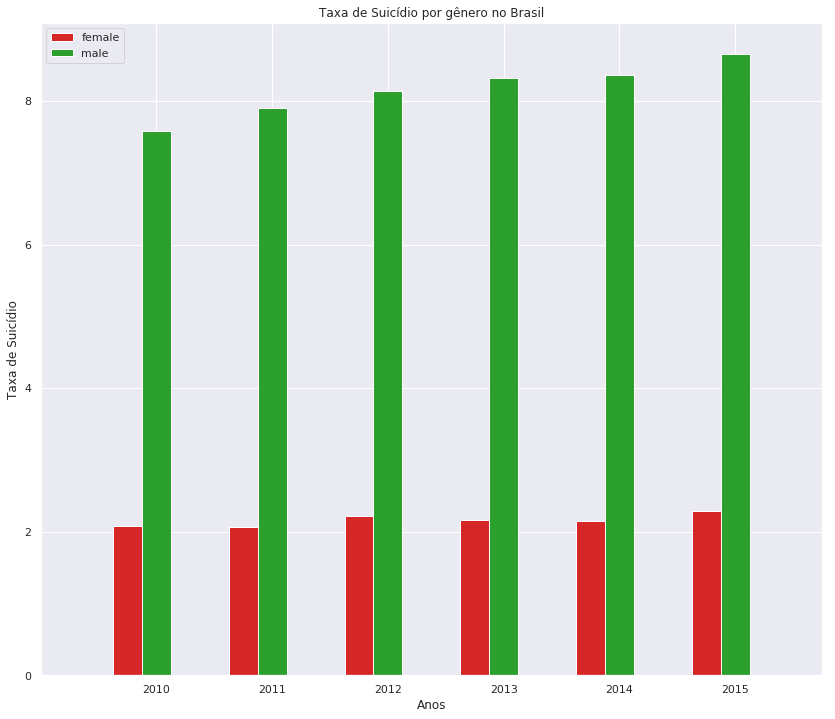

In [30]:
generate_chart_suicide_gen(gbr, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Brasil",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


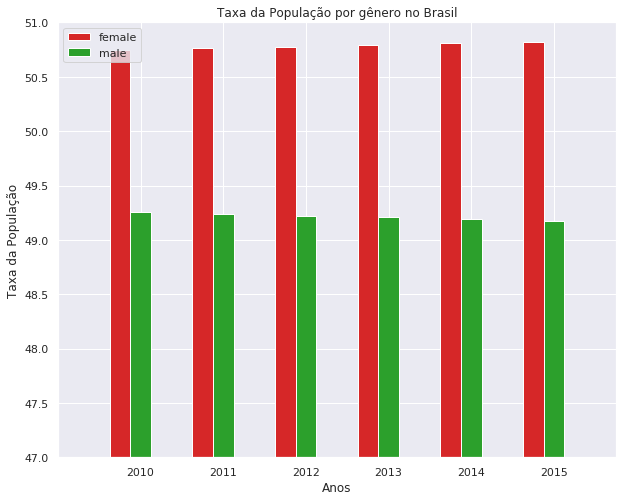

In [31]:
generate_chart_rate_population_gen(gbr, "Taxa da População", "Anos", "Taxa da População por gênero no Brasil",male_female_colors,47,51,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


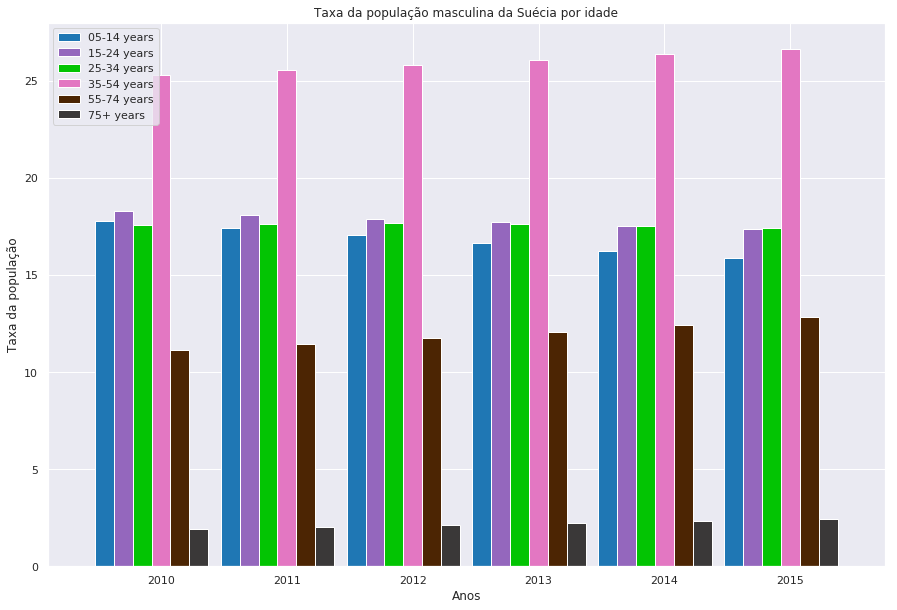

In [80]:
generate_chart_rate_population_age(brazil_male, "Taxa da população", "Anos", "Taxa da população masculina do Brasil por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


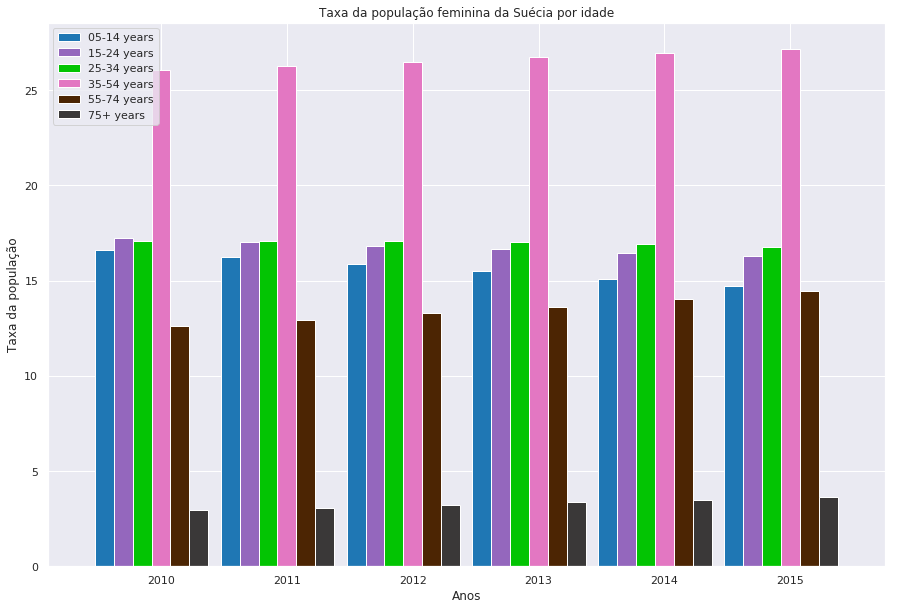

In [82]:
generate_chart_rate_population_age(brazil_female, "Taxa da população", "Anos", "Taxa da população feminina do Brasil por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


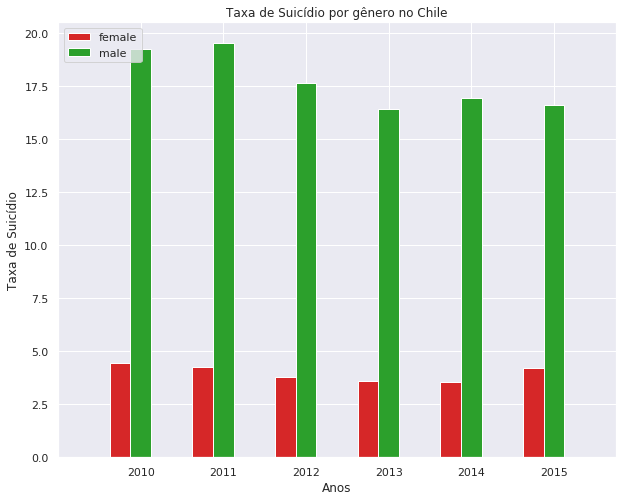

In [32]:
generate_chart_suicide_gen(gch, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Chile",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


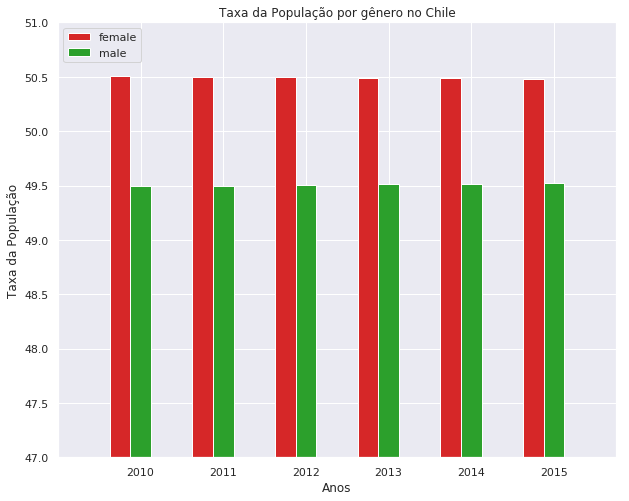

In [33]:
generate_chart_rate_population_gen(gch, "Taxa da População", "Anos", "Taxa da População por gênero no Chile",male_female_colors,47,51,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


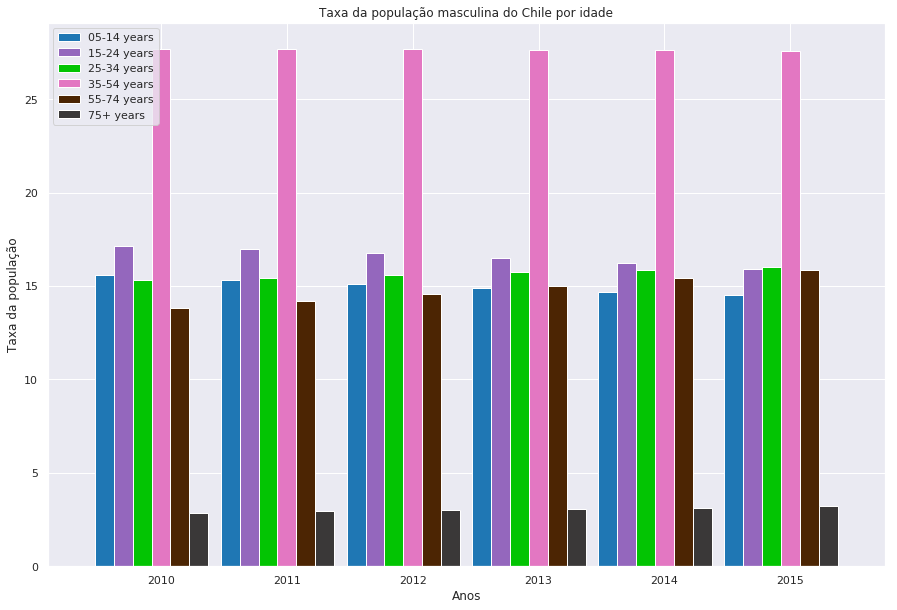

In [83]:
generate_chart_rate_population_age(chile_male, "Taxa da população", "Anos", "Taxa da população masculina do Chile por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


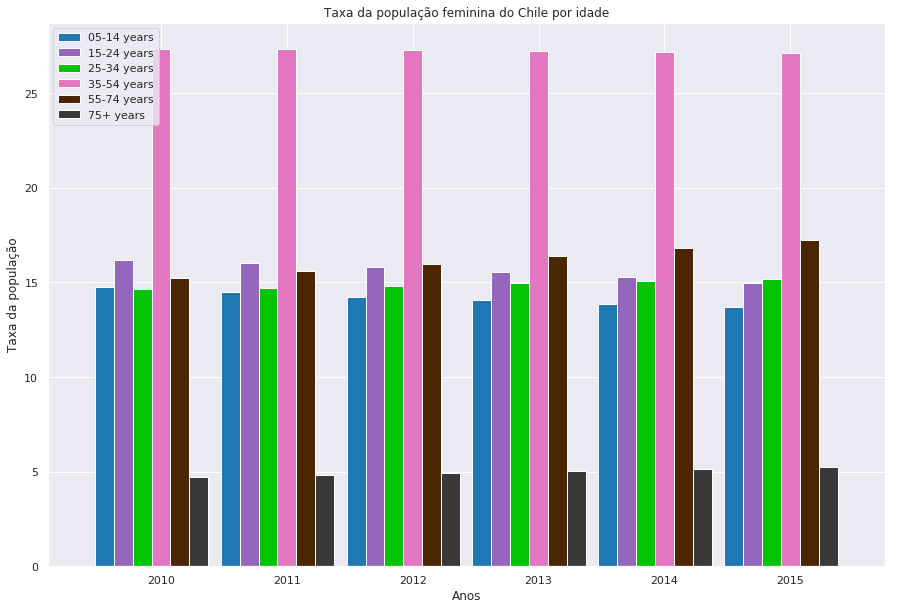

In [84]:
generate_chart_rate_population_age(chile_female, "Taxa da população", "Anos", "Taxa da população feminina do Chile por idade", "totalPopulationFemale",age_colors)


/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


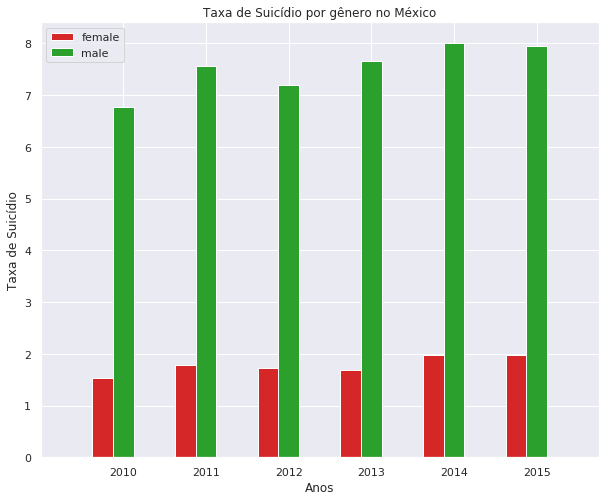

In [34]:
generate_chart_suicide_gen(gme, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no México",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


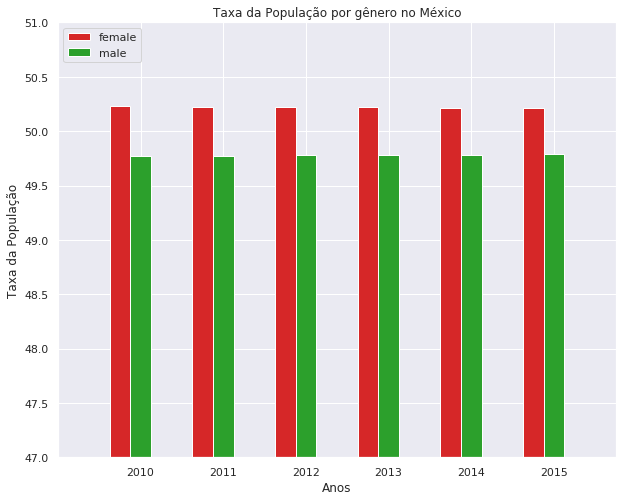

In [35]:
generate_chart_rate_population_gen(gme, "Taxa da População", "Anos", "Taxa da População por gênero no México",male_female_colors,47,51,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


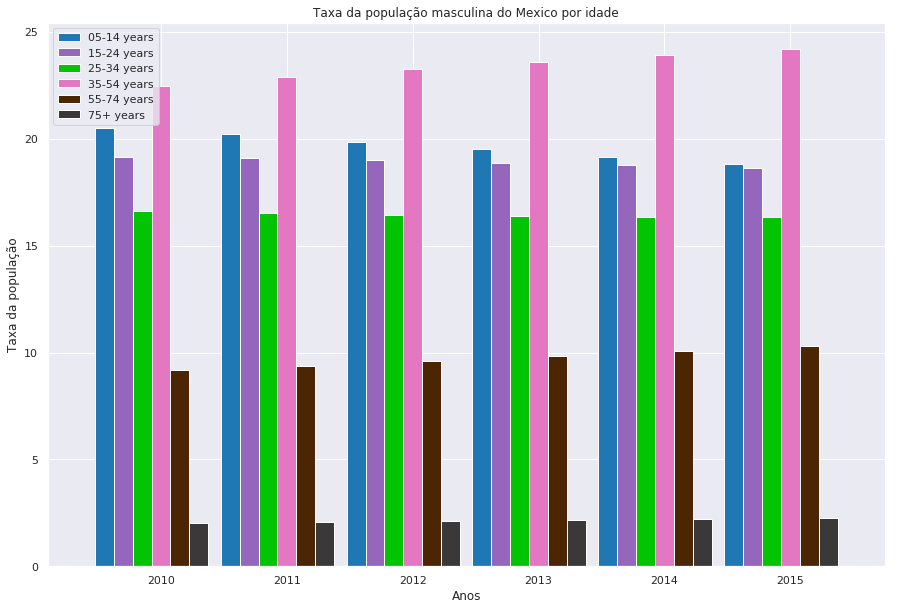

In [85]:
generate_chart_rate_population_age(mexico_male, "Taxa da população", "Anos", "Taxa da população masculina do Mexico por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


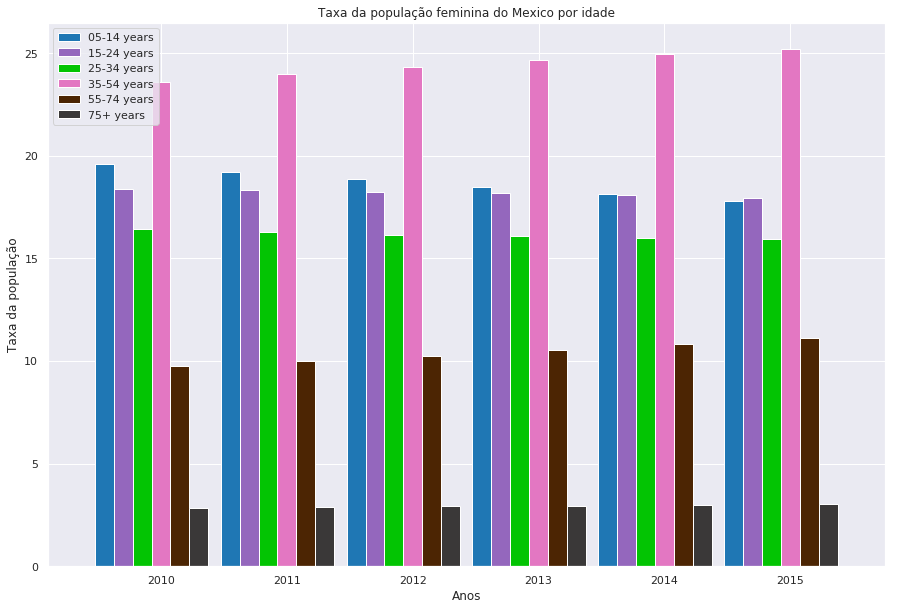

In [86]:
generate_chart_rate_population_age(mexico_female, "Taxa da população", "Anos", "Taxa da população feminina do Mexico por idade", "totalPopulationFemale",age_colors)


/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


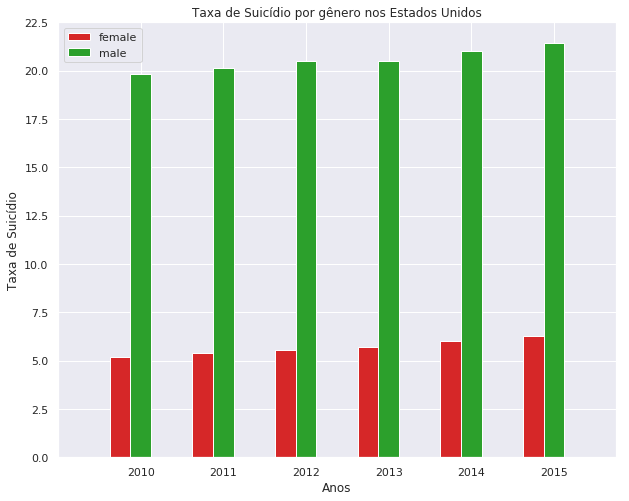

In [36]:
generate_chart_suicide_gen(gus, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero nos Estados Unidos",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


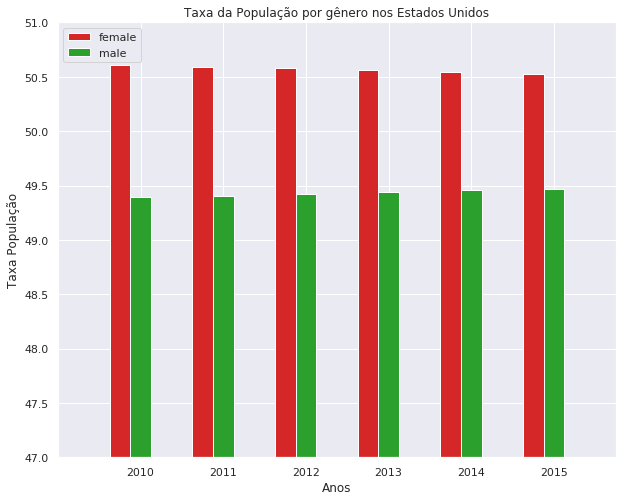

In [37]:
generate_chart_rate_population_gen(gus, "Taxa População", "Anos", "Taxa da População por gênero nos Estados Unidos",male_female_colors,47,51,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


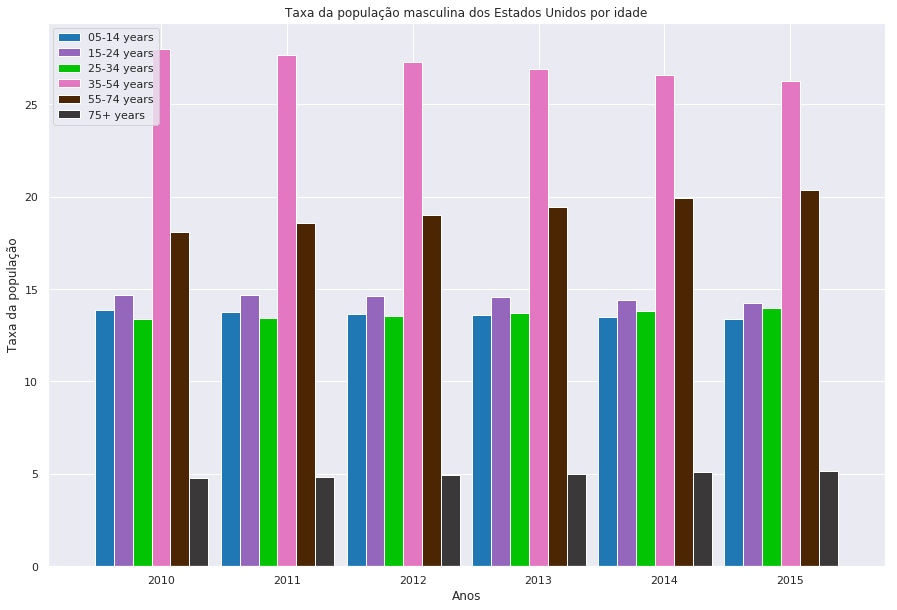

In [87]:
generate_chart_rate_population_age(unitedStates_male, "Taxa da população", "Anos", "Taxa da população masculina dos Estados Unidos por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


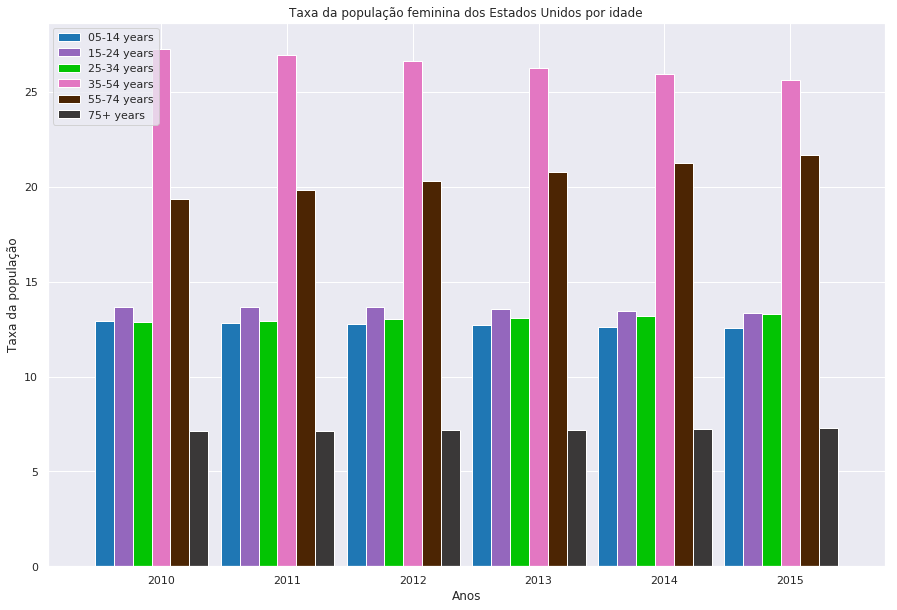

In [88]:
generate_chart_rate_population_age(unitedStates_female, "Taxa da população", "Anos", "Taxa da população feminina dos Estados Unidos por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


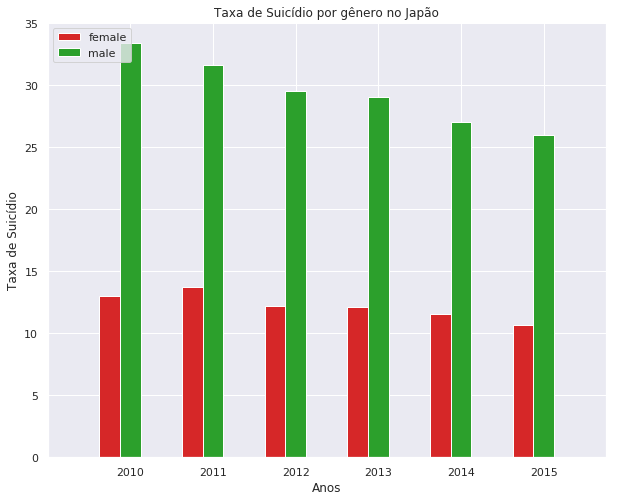

In [38]:
generate_chart_suicide_gen(gjp, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Japão",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


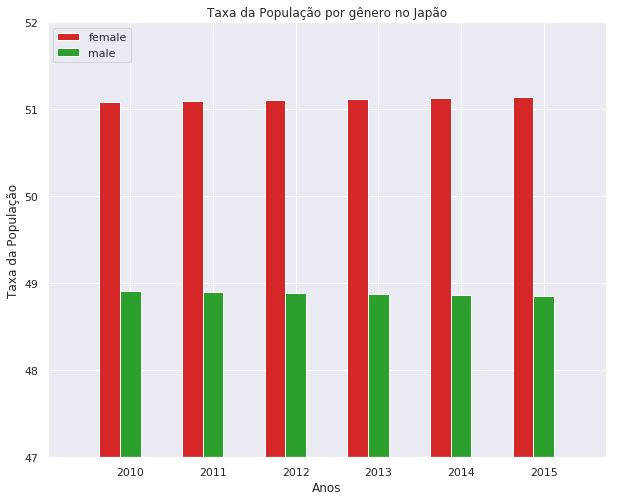

In [39]:
generate_chart_rate_population_gen(gjp, "Taxa da População", "Anos", "Taxa da População por gênero no Japão",male_female_colors,47,52,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


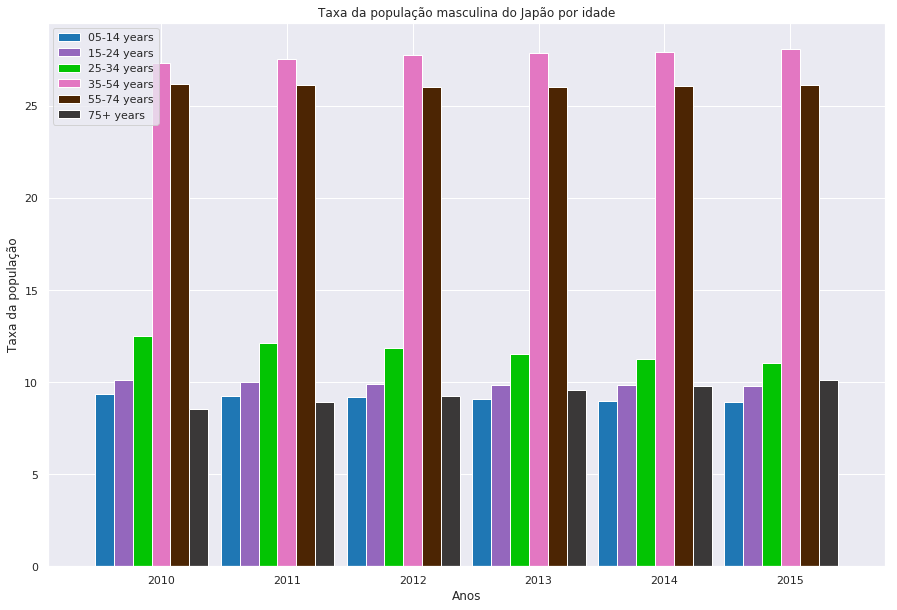

In [91]:
generate_chart_rate_population_age(japan_male, "Taxa da população", "Anos", "Taxa da população masculina do Japão por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


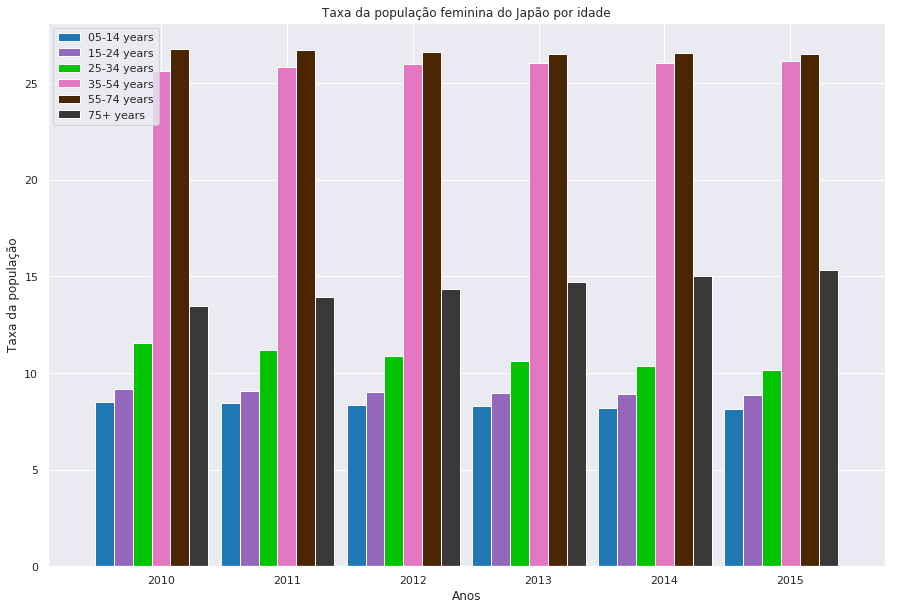

In [92]:
generate_chart_rate_population_age(japan_female, "Taxa da população", "Anos", "Taxa da população feminina do Japão por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


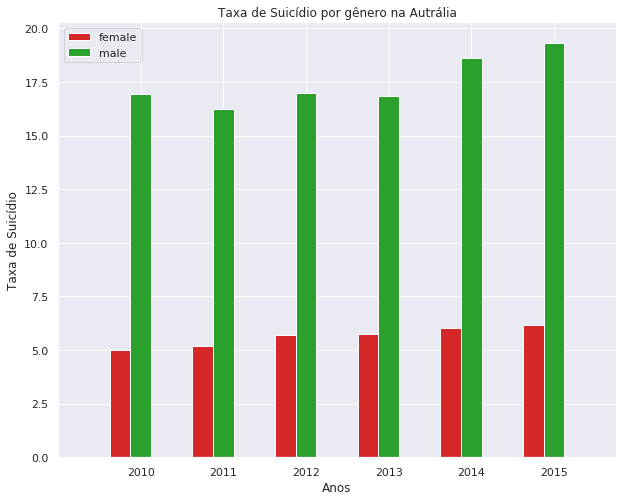

In [40]:
generate_chart_suicide_gen(gau, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Autrália",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


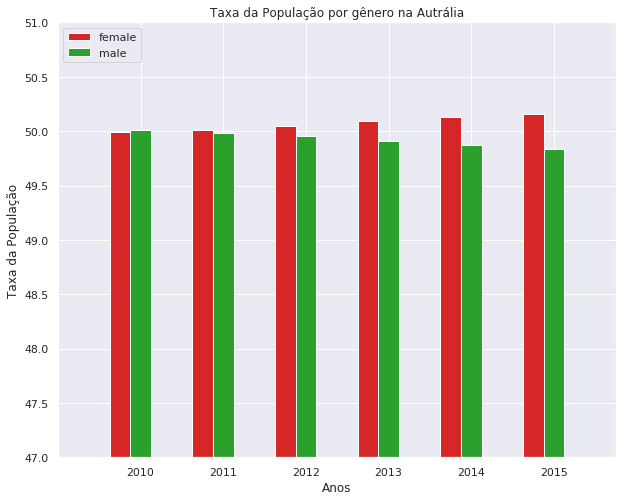

In [41]:
generate_chart_rate_population_gen(gau, "Taxa da População", "Anos", "Taxa da População por gênero na Autrália",male_female_colors,47,51,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


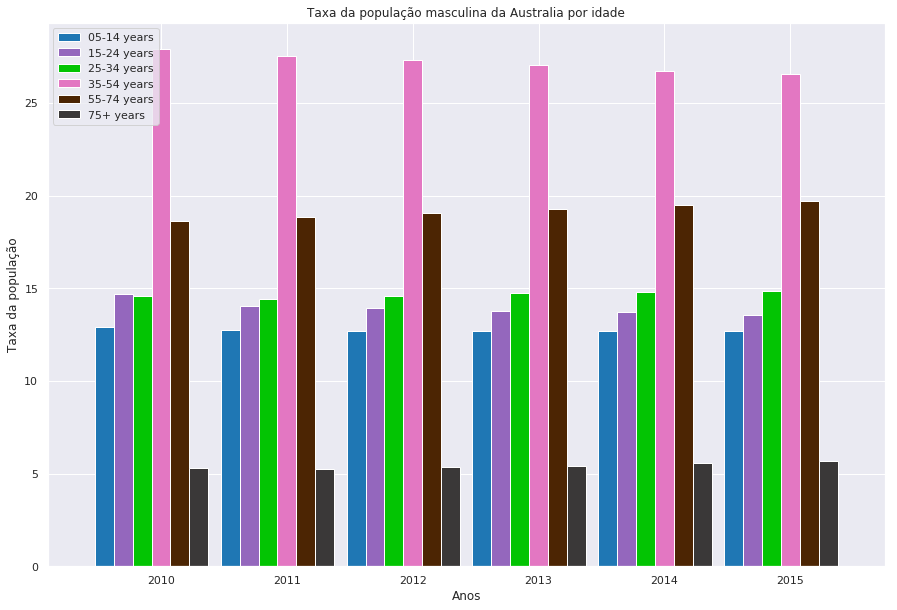

In [93]:
generate_chart_rate_population_age(australia_male, "Taxa da população", "Anos", "Taxa da população masculina da Australia por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


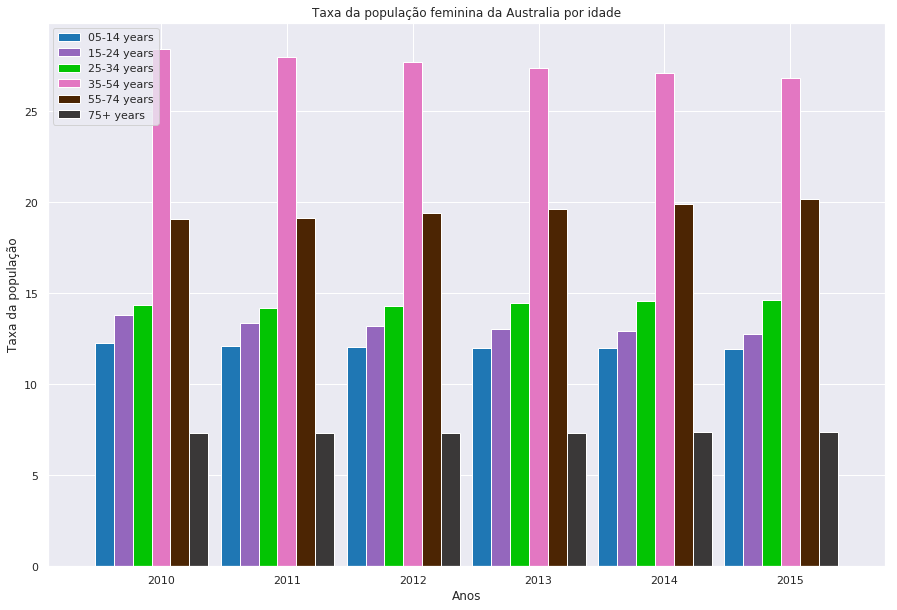

In [94]:
generate_chart_rate_population_age(australia_female, "Taxa da população", "Anos", "Taxa da população feminina da Australia por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


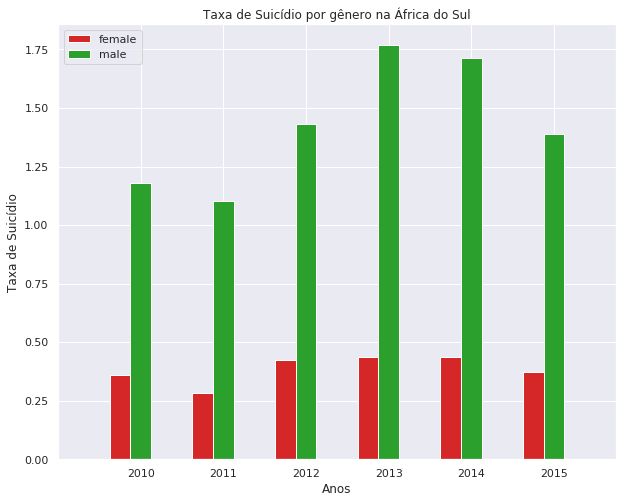

In [42]:
generate_chart_suicide_gen(gsa, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na África do Sul",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


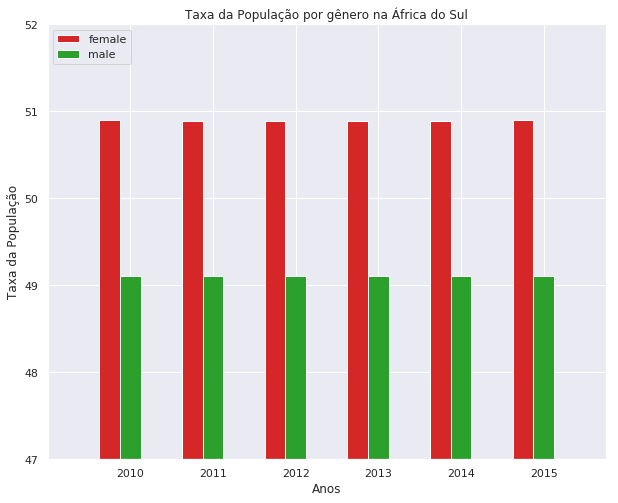

In [43]:
generate_chart_rate_population_gen(gsa, "Taxa da População", "Anos", "Taxa da População por gênero na África do Sul",male_female_colors,47,52,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


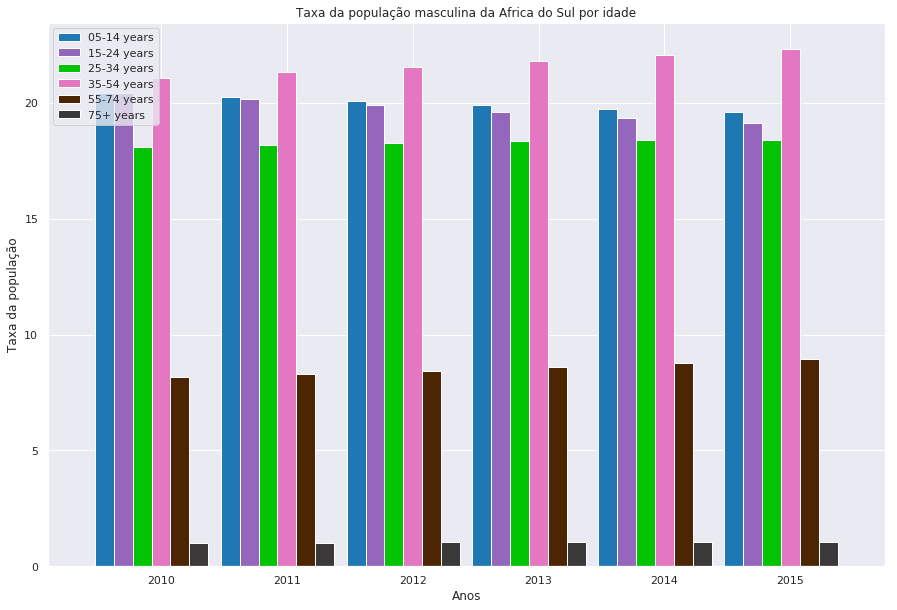

In [95]:
generate_chart_rate_population_age(southAfrica_male, "Taxa da população", "Anos", "Taxa da população masculina da Africa do Sul por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


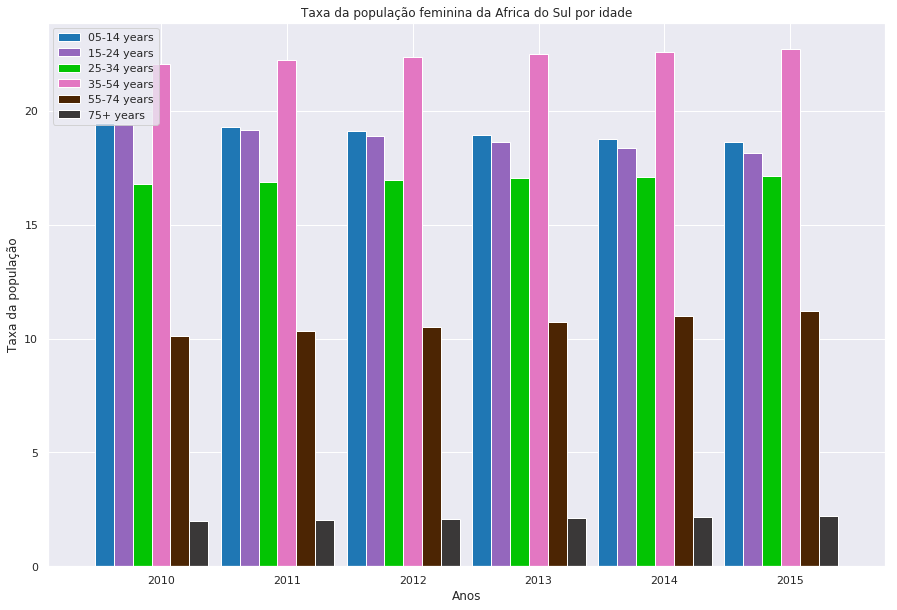

In [96]:
generate_chart_rate_population_age(southAfrica_female, "Taxa da população", "Anos", "Taxa da população feminina da Africa do Sul por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


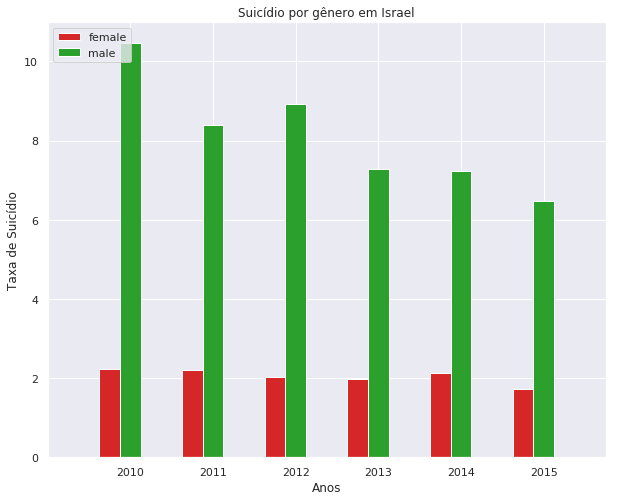

In [44]:
generate_chart_suicide_gen(gis, "Taxa de Suicídio", "Anos", "Suicídio por gênero em Israel",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


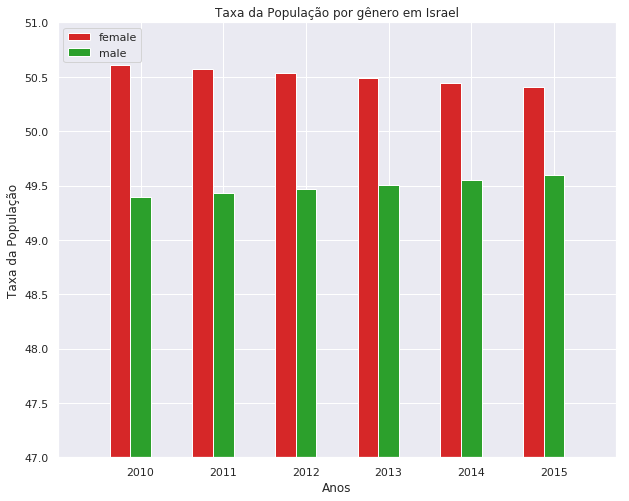

In [45]:
generate_chart_rate_population_gen(gis, "Taxa da População", "Anos", "Taxa da População por gênero em Israel",male_female_colors,47,51,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


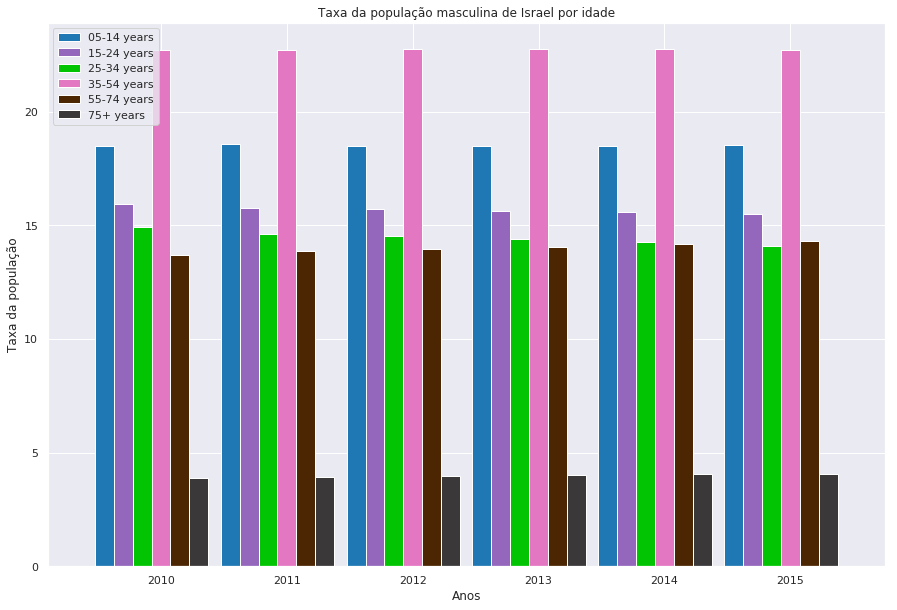

In [97]:
generate_chart_rate_population_age(israel_male, "Taxa da população", "Anos", "Taxa da população masculina de Israel por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


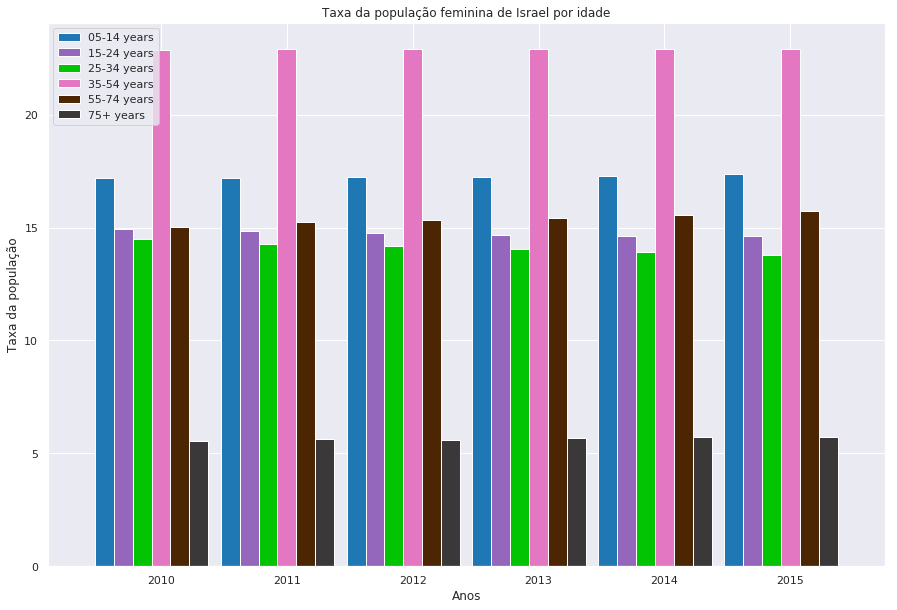

In [100]:
generate_chart_rate_population_age(israel_female, "Taxa da população", "Anos", "Taxa da população feminina de Israel por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


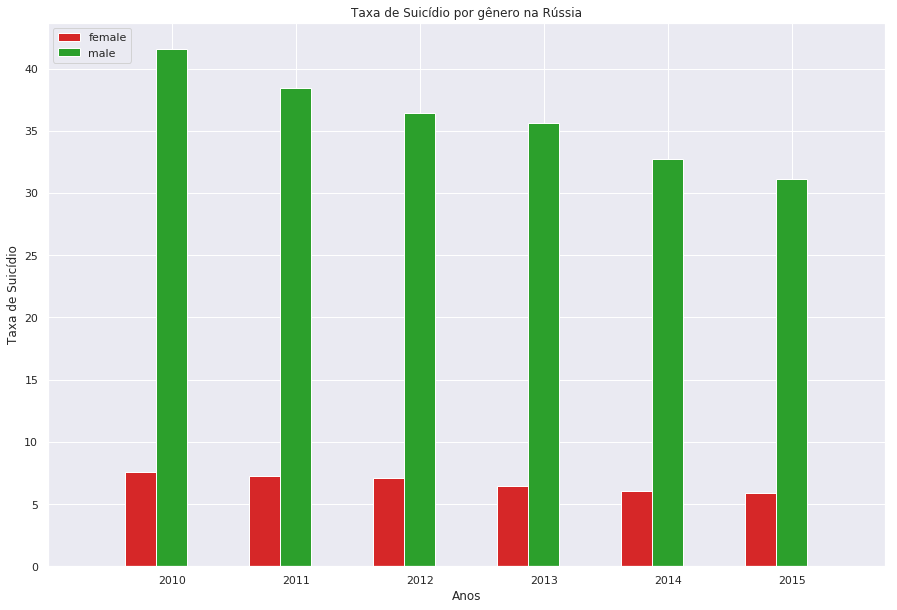

In [98]:
generate_chart_suicide_gen(gru, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Rússia",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


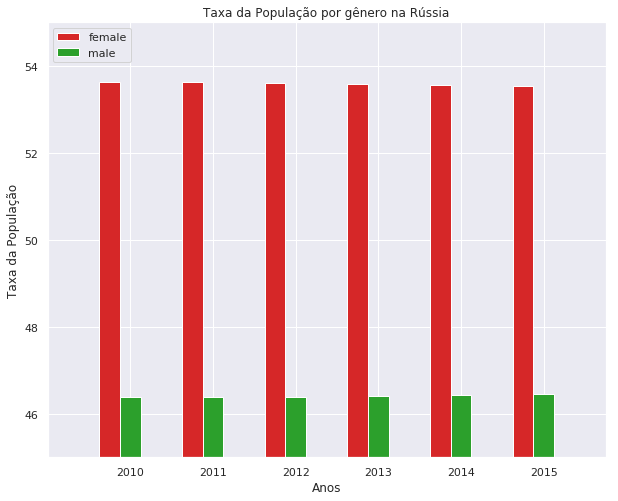

In [47]:
generate_chart_rate_population_gen(gru, "Taxa da População", "Anos", "Taxa da População por gênero na Rússia",male_female_colors,45,55,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


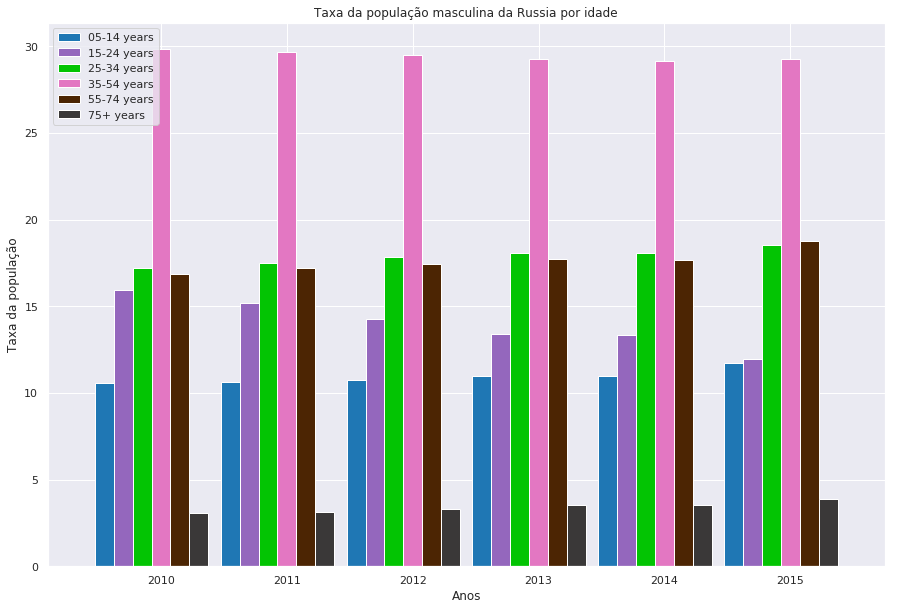

In [101]:
generate_chart_rate_population_age(russia_male, "Taxa da população", "Anos", "Taxa da população masculina da Russia por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


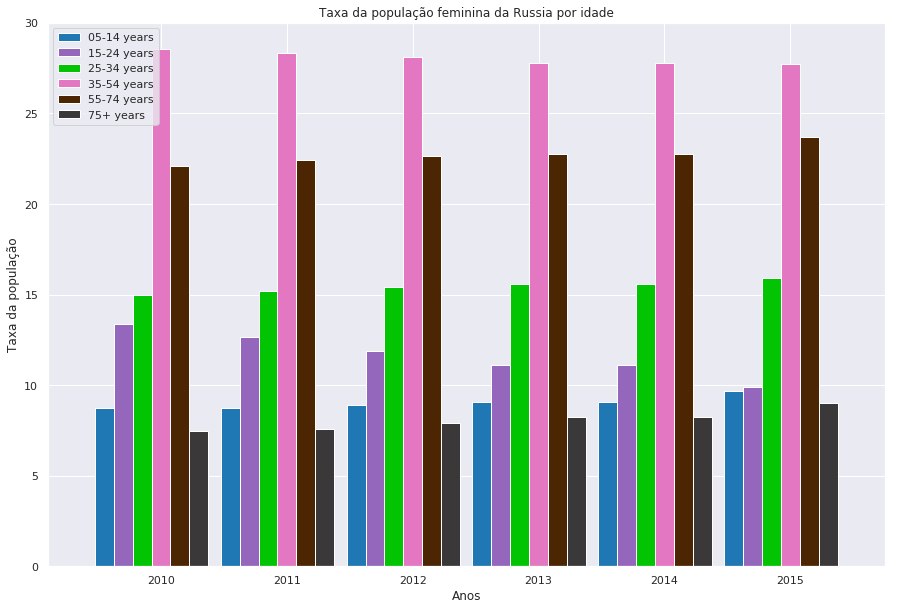

In [104]:
generate_chart_rate_population_age(russia_female, "Taxa da população", "Anos", "Taxa da população feminina da Russia por idade", "totalPopulationFemale",age_colors)


/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


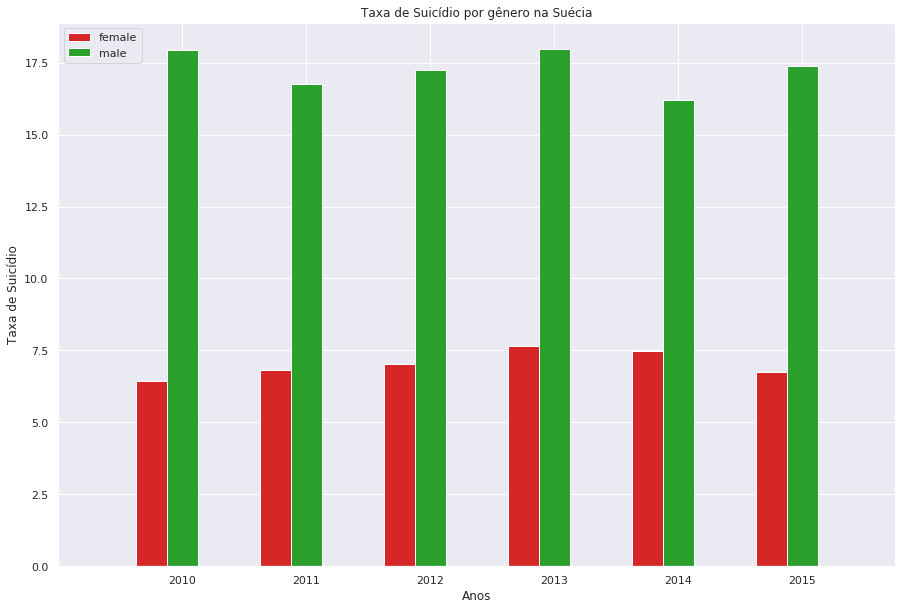

In [102]:
generate_chart_suicide_gen(gsw, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Suécia",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


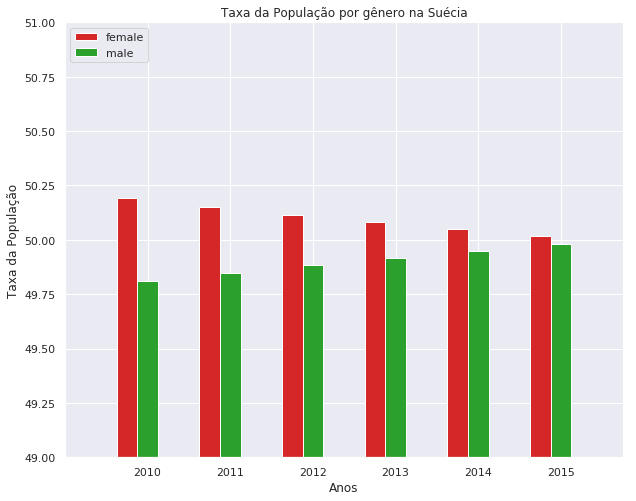

In [49]:
generate_chart_rate_population_gen(gsw, "Taxa da População", "Anos", "Taxa da População por gênero na Suécia",male_female_colors,49,51,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


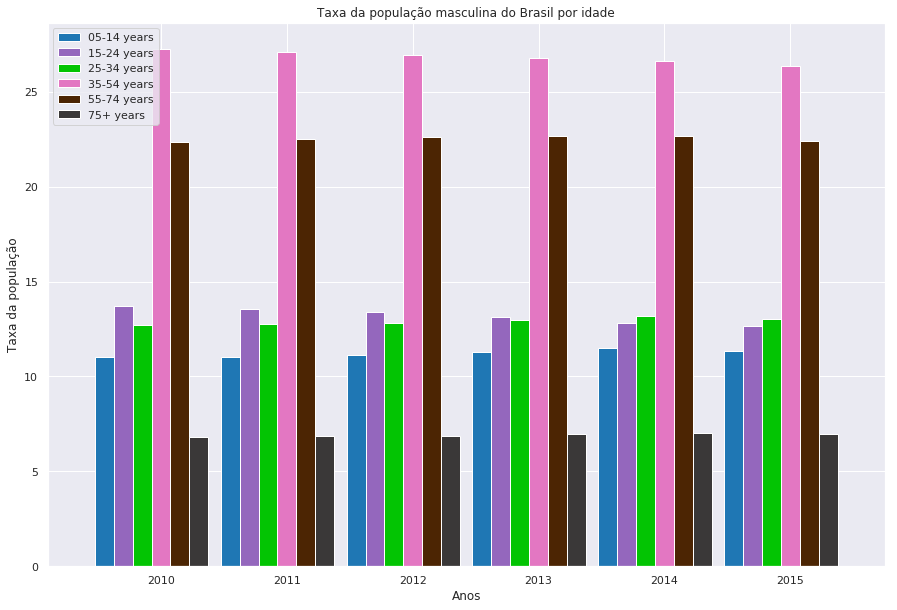

In [105]:
generate_chart_rate_population_age(sweden_male, "Taxa da população", "Anos", "Taxa da população masculina da Suecia por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


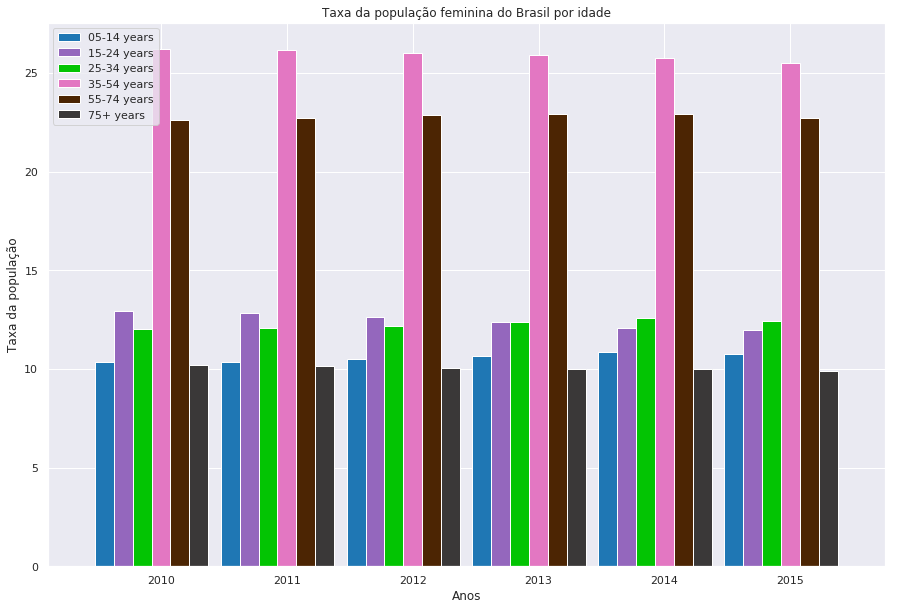

In [106]:
generate_chart_rate_population_age(sweden_female, "Taxa da população", "Anos", "Taxa da população feminina da Suecia por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


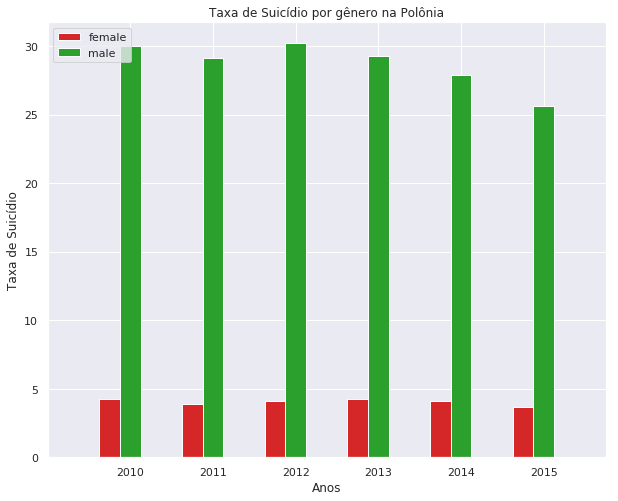

In [50]:
generate_chart_suicide_gen(gpo, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Polônia",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


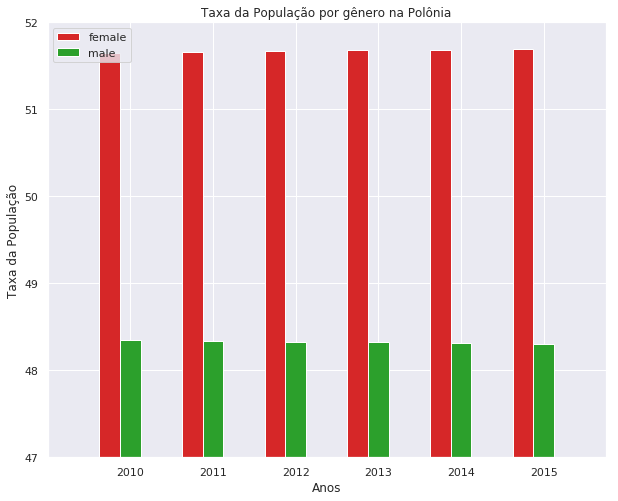

In [51]:
generate_chart_rate_population_gen(gpo, "Taxa da População", "Anos", "Taxa da População por gênero na Polônia",male_female_colors,47,52,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


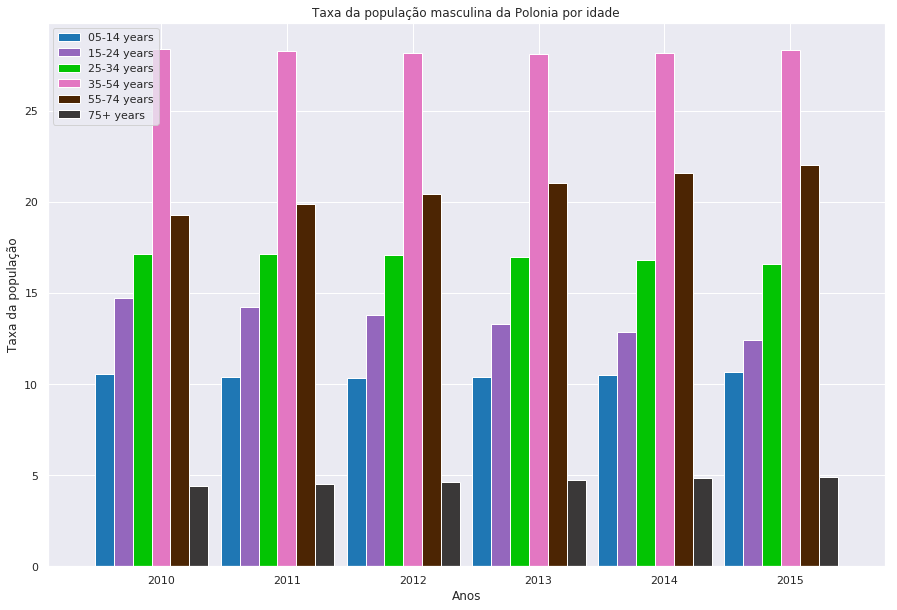

In [107]:
generate_chart_rate_population_age(poland_male, "Taxa da população", "Anos", "Taxa da população masculina da Polonia por idade", "totalPopulationMale",age_colors)


/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


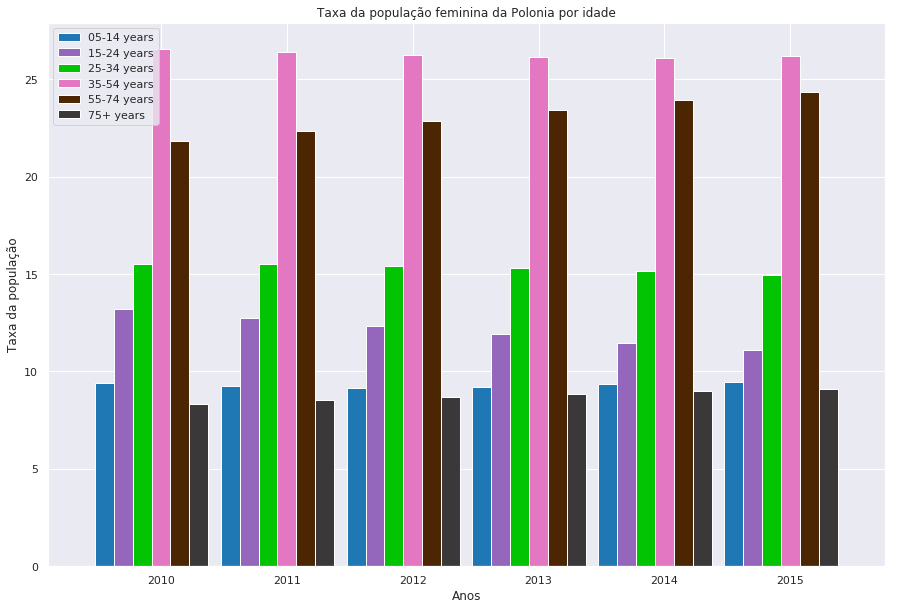

In [108]:
generate_chart_rate_population_age(poland_female, "Taxa da população", "Anos", "Taxa da população feminina da Polonia por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


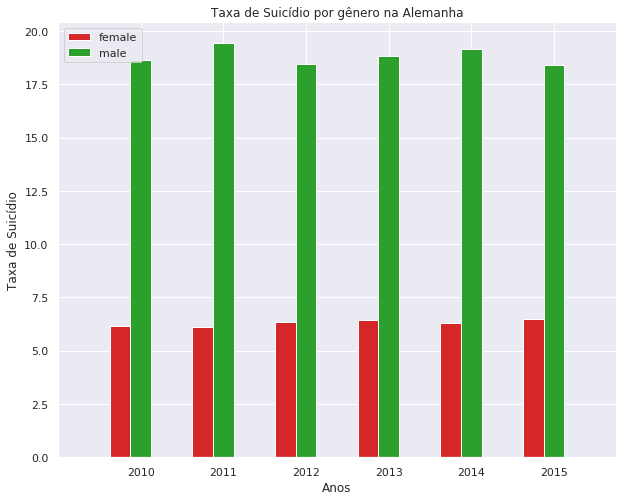

In [52]:
generate_chart_suicide_gen(gge, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Alemanha",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


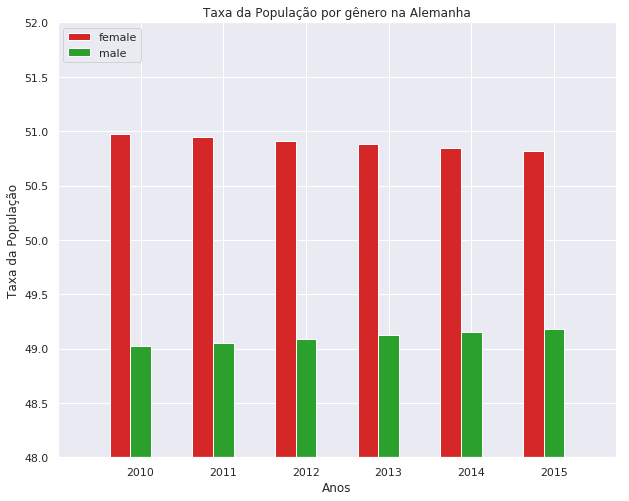

In [53]:
generate_chart_rate_population_gen(gge, "Taxa da População", "Anos", "Taxa da População por gênero na Alemanha",male_female_colors,48,52,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


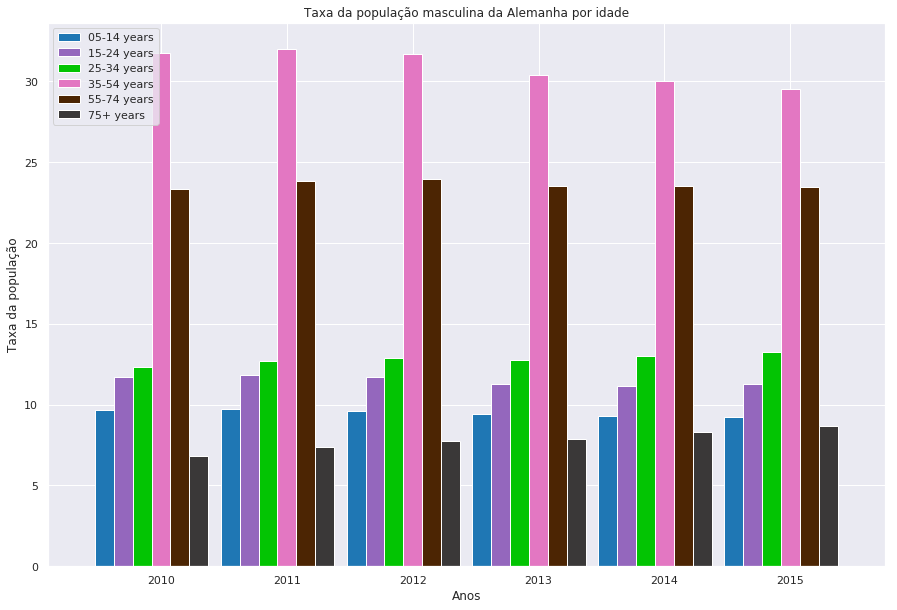

In [109]:
generate_chart_rate_population_age(germany_male, "Taxa da população", "Anos", "Taxa da população masculina da Alemanha por idade", "totalPopulationMale",age_colors)


/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


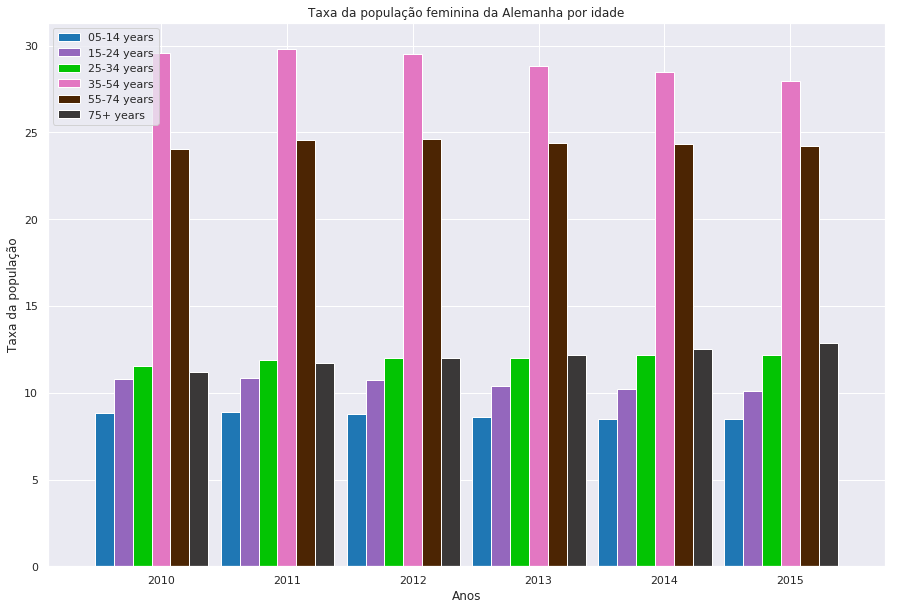

In [110]:
generate_chart_rate_population_age(germany_female, "Taxa da população", "Anos", "Taxa da população feminina da Alemanha por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


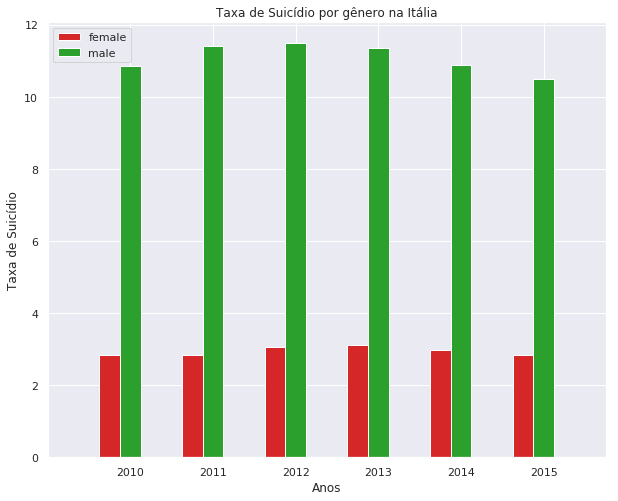

In [54]:
generate_chart_suicide_gen(git, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Itália",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


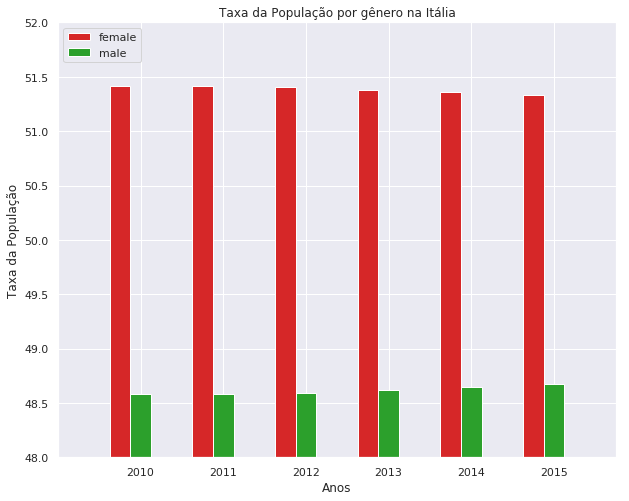

In [55]:
generate_chart_rate_population_gen(git, "Taxa da População", "Anos", "Taxa da População por gênero na Itália",male_female_colors,48,52,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


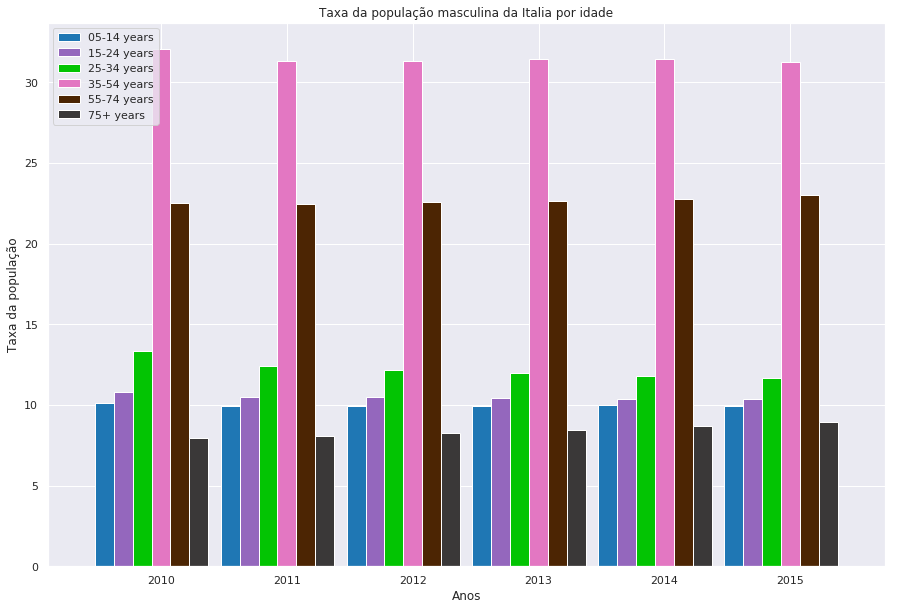

In [111]:
generate_chart_rate_population_age(italy_male, "Taxa da população", "Anos", "Taxa da população masculina da Italia por idade", "totalPopulationMale",age_colors)


/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


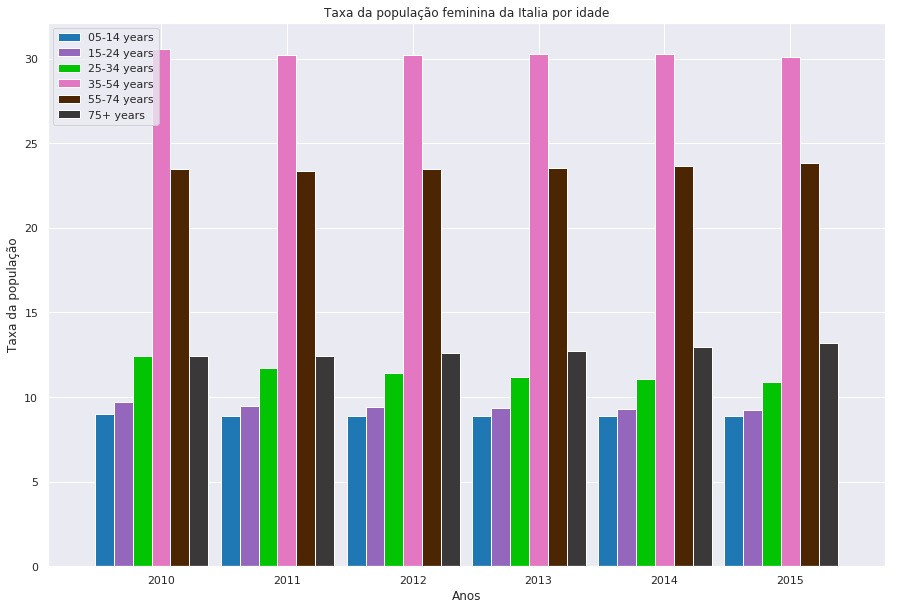

In [112]:
generate_chart_rate_population_age(italy_female, "Taxa da população", "Anos", "Taxa da população feminina da Italia por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


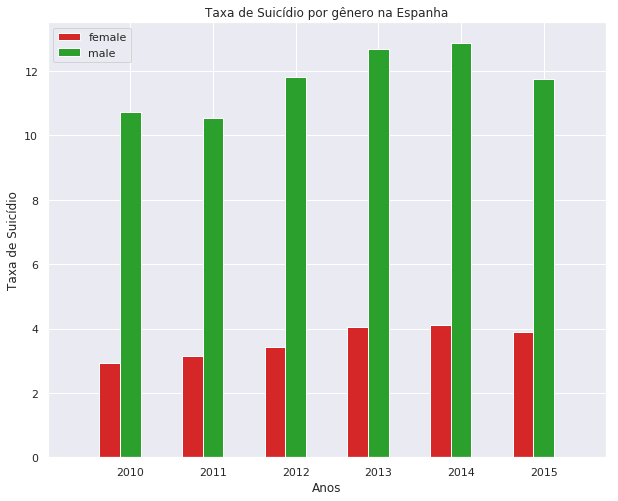

In [56]:
generate_chart_suicide_gen(gsp, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Espanha",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


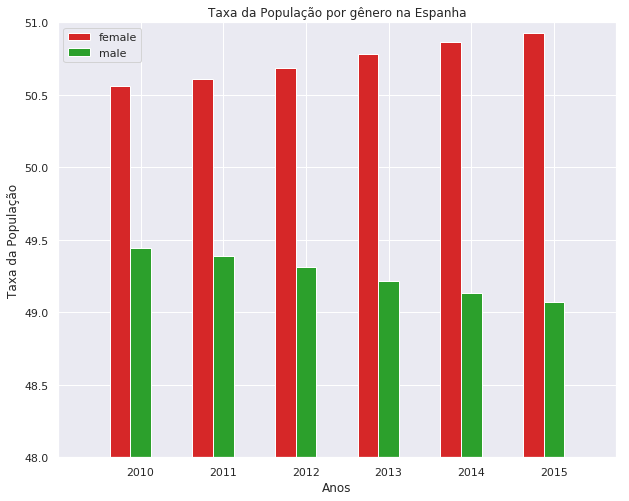

In [57]:
generate_chart_rate_population_gen(gsp, "Taxa da População", "Anos", "Taxa da População por gênero na Espanha",male_female_colors,48,51,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


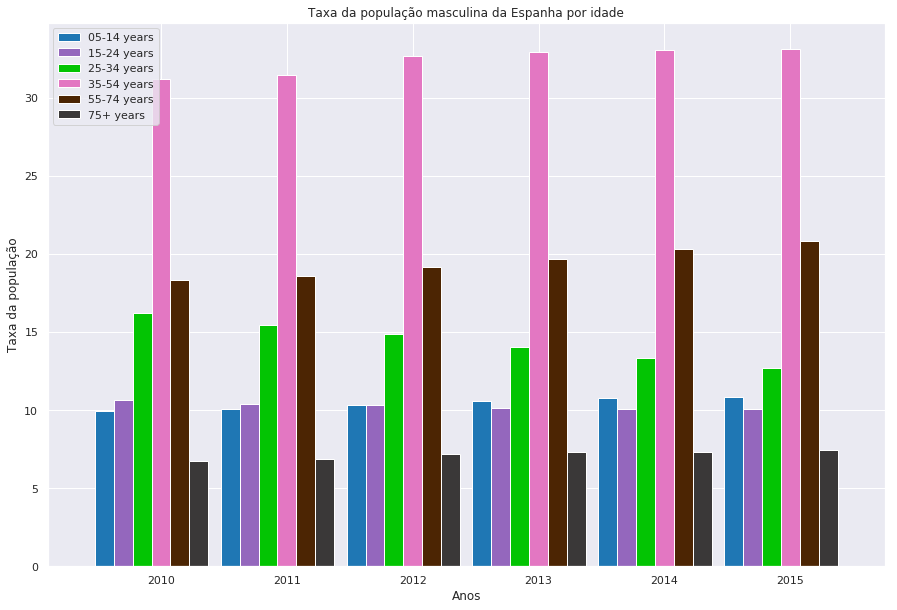

In [113]:
generate_chart_rate_population_age(spain_male, "Taxa da população", "Anos", "Taxa da população masculina da Espanha por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


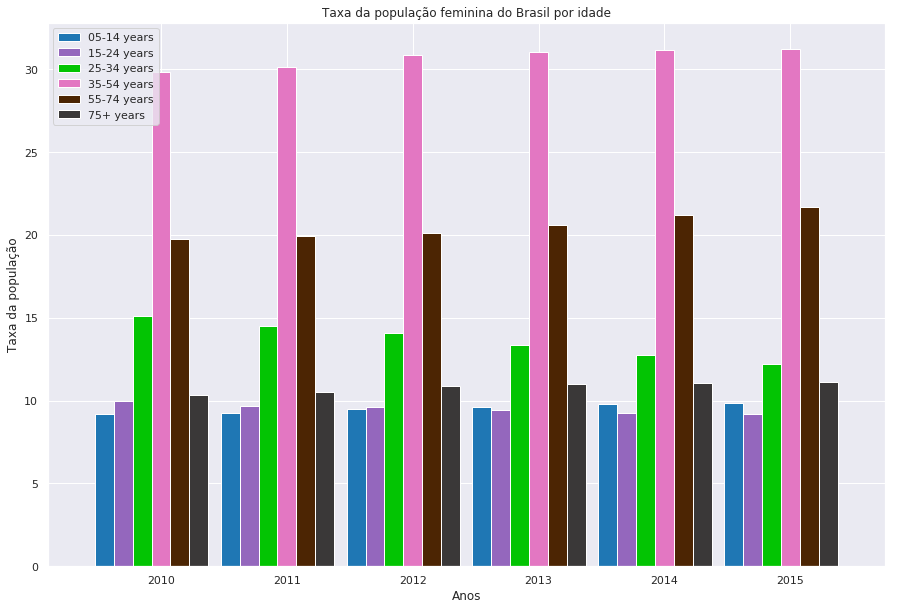

In [114]:
generate_chart_rate_population_age(spain_female, "Taxa da população", "Anos", "Taxa da população feminina da Espanha por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


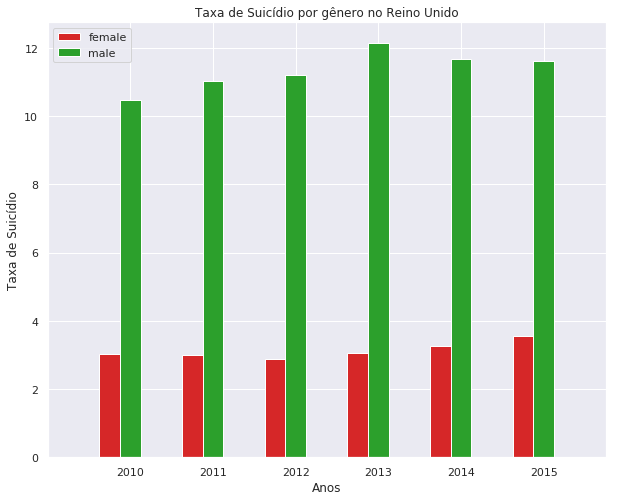

In [58]:
generate_chart_suicide_gen(guk, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero no Reino Unido",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


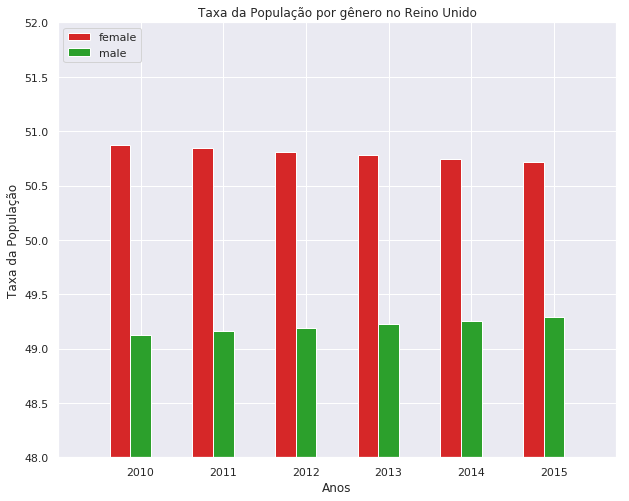

In [59]:
generate_chart_rate_population_gen(guk, "Taxa da População", "Anos", "Taxa da População por gênero no Reino Unido",male_female_colors,48,52,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


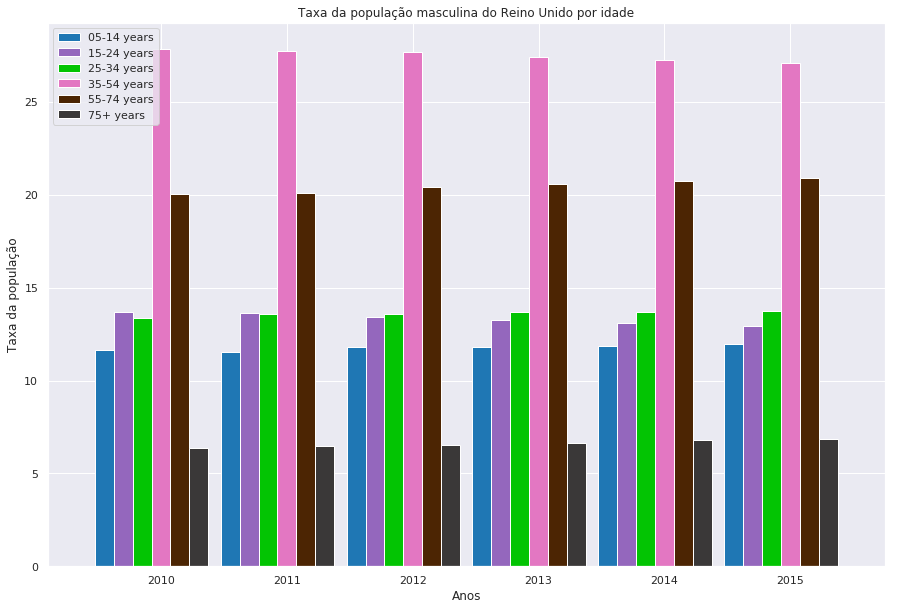

In [117]:
generate_chart_rate_population_age(unitedKingdom_male, "Taxa da população", "Anos", "Taxa da população masculina do Reino Unido por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


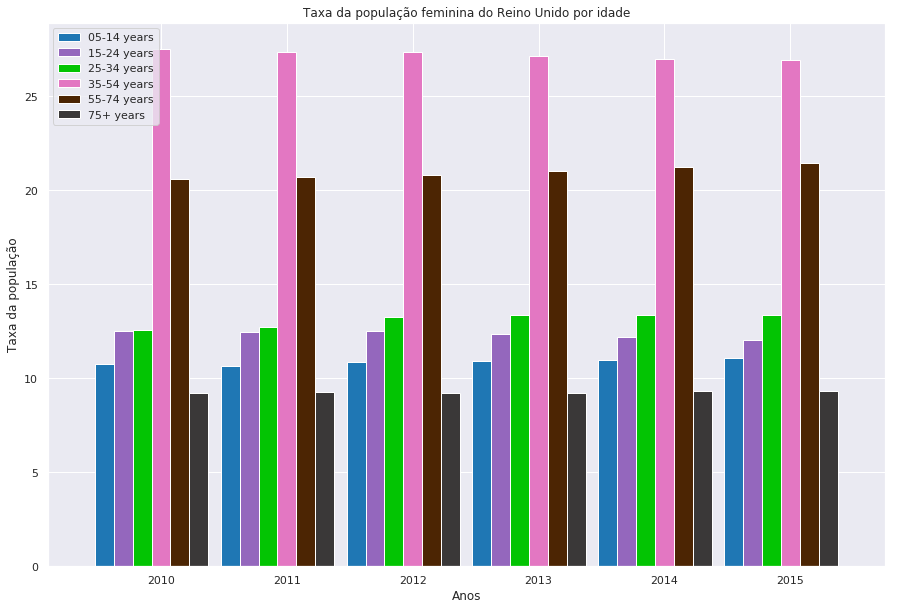

In [118]:
generate_chart_rate_population_age(unitedKingdom_female, "Taxa da população", "Anos", "Taxa da população feminina do Reino Unido por idade", "totalPopulationFemale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


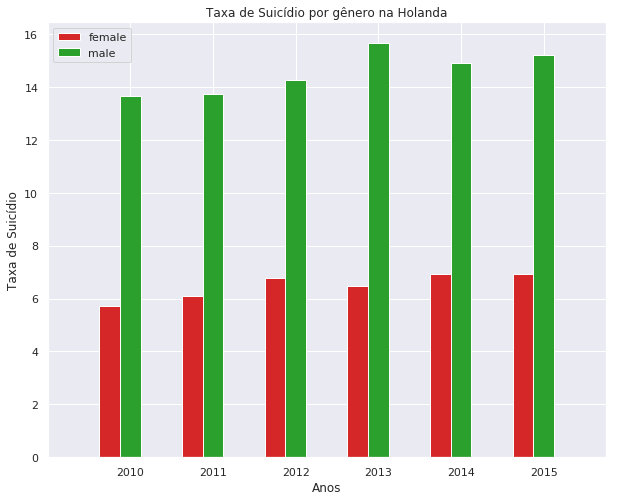

In [60]:
generate_chart_suicide_gen(gne, "Taxa de Suicídio", "Anos", "Taxa de Suicídio por gênero na Holanda",male_female_colors, 0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


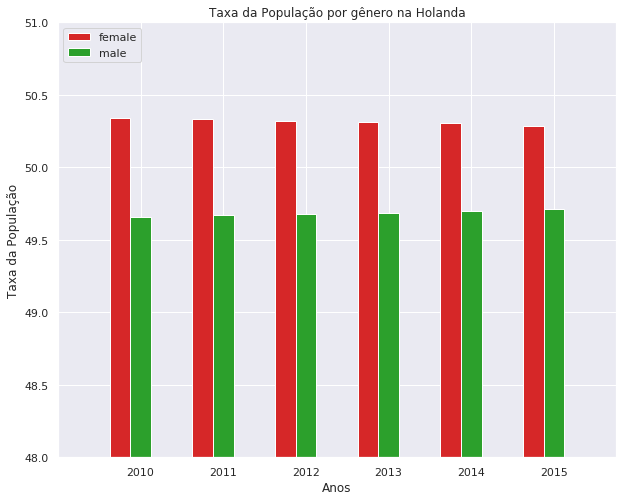

In [61]:
generate_chart_rate_population_gen(gne, "Taxa da População", "Anos", "Taxa da População por gênero na Holanda",male_female_colors,48,51,0.25)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


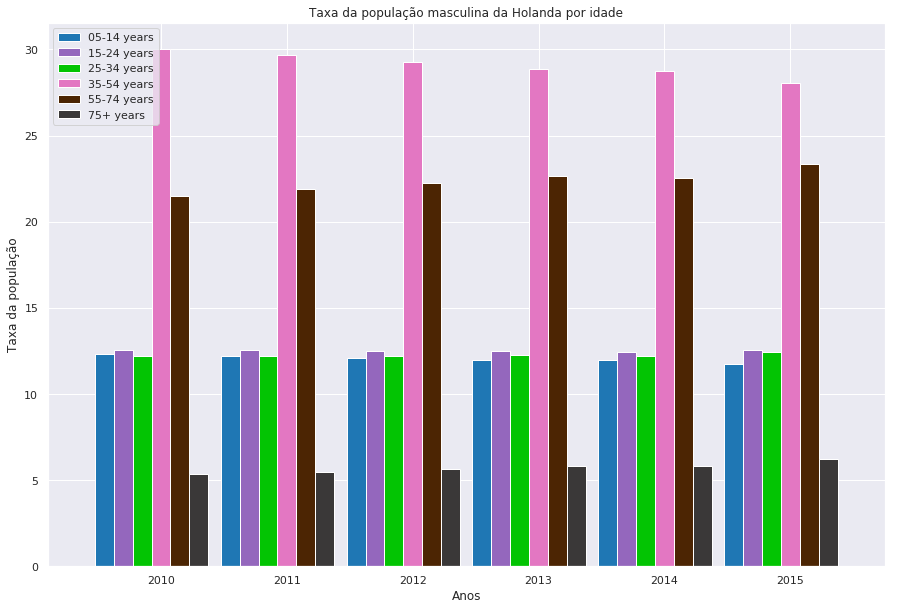

In [115]:
generate_chart_rate_population_age(netherlands_male, "Taxa da população", "Anos", "Taxa da população masculina da Holanda por idade", "totalPopulationMale",age_colors)

/home/braz/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


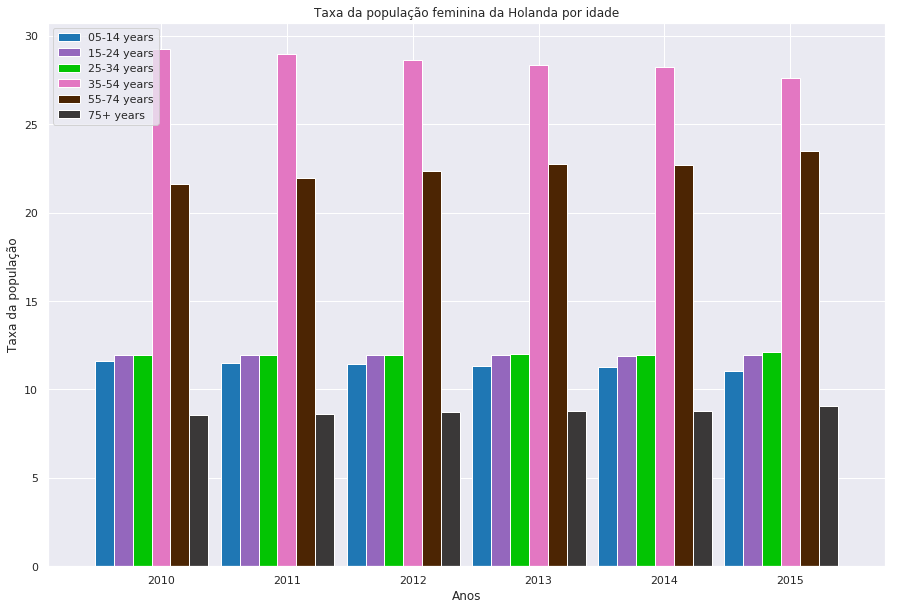

In [116]:
generate_chart_rate_population_age(netherlands_female, "Taxa da população", "Anos", "Taxa da população feminina da Holanda por idade", "totalPopulationFemale",age_colors)

In [62]:
#generate_chart_gender_inequality(gamerica,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na América", america_colors)

In [63]:
#generate_chart_gender_inequality(geurons,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Europa Norte e Sul", europe_ns_colors)

In [64]:
#generate_chart_gender_inequality(geurowe,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Europa Ocidental e Oriental", europe_we_colors)

In [65]:
#generate_chart_gender_inequality(gaao,"Taxa de desigualdade de gênero","Anos","Desigualdade de gênero na Ásia, África e Oceania", aao_colors)

In [66]:
#generate_chart_rate_population_age(sweden_male, "Taxa da população", "Anos", "Taxa da população masculina da Suécia por idade", "totalPopulationMale",age_colors)